# H&M Personalized Fashion Recommendations

Techniques and tools used: sns, plt, pandas, filtering/grouping/merging data, image handling, wordcloud,

Kaggle competition link: https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/overview

Refs
1. https://www.kaggle.com/code/vanguarde/h-m-eda-first-look
2. https://www.kaggle.com/code/gpreda/h-m-eda-and-prediction 
3. https://www.kaggle.com/code/bgourav/eda-h-m-customer-behaviour-and-buying-patterns 
4. https://www.kaggle.com/code/julian3833/h-m-collaborative-filtering-user-user/notebook
5. https://www.kaggle.com/code/luisrodri97/item-based-collaborative-filtering

## EDA

1. [Articles](#articles)
2. [Customers](#customers)
3. [Transactions](#transactions)
4. [Images with description and price](#images-with-description-and-price)

## EDA 2

1. [Data Analysis](#data-analysis)
2. [Simple Prediction](#simple-prediction)

## Model training, prediction, and evaluation

1. [Collaborative Filtering (CF)](#collaborative-filtering-cf)
2. [Content-Based Filtering (CB)](#content-based-filtering-cb)
3. [Other Models](#other-models)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Turn on copy on write mode for pandas 3.0+
# pd.options.mode.copy_on_write = True
pd.options.mode.copy_on_write = "warn"

In [2]:
articles = pd.read_csv("./data/h-and-m-personalized-fashion-recommendations/articles.csv")
customers = pd.read_csv("./data/h-and-m-personalized-fashion-recommendations/customers.csv")
transactions = pd.read_csv("./data/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

### Articles

This table contains all h&m articles with details such as a type of product, a color, a product group and other features.
Article data description:

`article_id` : A unique identifier of every article.  
`product_code, prod_name` : A unique identifier of every product and its name (not the same).  
`product_type, product_type_name` : The group of product_code and its name.  
`graphical_appearance_no, graphical_appearance_name` : The group of graphics and its name.  
`colour_group_code, colour_group_name` : The group of color and its name.  
`perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name` : The added color info.  
`department_no, department_name` : A unique identifier of every dep and its name. 
`index_code, index_name` : A unique identifier of every index and its name.  
`index_group_no, index_group_name` : A group of indeces and its name.  
`section_no, section_name` : A unique identifier of every section and its name.   
`garment_group_no, garment_group_name` : A unique identifier of every garment and its name.  
`detail_desc` : Details. 

In [3]:
articles.head()

article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                     Solid                  9             Black  ...   
1                     Solid                 10             White  ...   
2                    Stripe                 11         Off White  ...   
3                     Solid                  9             Black  ...   
4                     Solid                 10             White  ...   

   department_name index_code        index_name index_group_no  \
0     Jersey Basic          A        Ladieswear              1   
1     Jersey Basic          A        Ladieswear              1   
2     Jersey Basic          A        Ladieswear              1   
3   Clean Lingerie          B  Lingeries/Tights              1   
4   Clean Lingerie          B  Lingeries/Tights              1   

   index_group_name section_no            section_name garment_group_no  \
0        Ladieswear         16  Womens Everyday Basics             1002   
1        Ladieswear         16  Womens Everyday Basics             1002   
2        Ladieswear         16  Womens Everyday Basics             1002   
3        Ladieswear         61         Womens Lingerie             1017   
4        Ladieswear         61         Womens Lingerie             1017   

   garment_group_name                                        detail_desc  
0        Jersey Basic            Jersey top with narrow shoulder straps.  
1        Jersey Basic            Jersey top with narrow shoulder straps.  
2        Jersey Basic            Jersey top with narrow shoulder straps.  
3   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  

[5 rows x 25 columns]

In [4]:
print('\n================ Value Counts ================\n')
print(articles['index_name'].value_counts())
print('\n================ Ratio ================\n')
print(articles['index_name'].value_counts() / len(articles))


================ Value Counts ================

index_name
Ladieswear                        26001
Divided                           15149
Menswear                          12553
Children Sizes 92-140             12007
Children Sizes 134-170             9214
Baby Sizes 50-98                   8875
Ladies Accessories                 6961
Lingeries/Tights                   6775
Children Accessories, Swimwear     4615
Sport                              3392
Name: count, dtype: int64

================ Ratio ================

index_name
Ladieswear                        0.246357
Divided                           0.143535
Menswear                          0.118938
Children Sizes 92-140             0.113765
Children Sizes 134-170            0.087302
Baby Sizes 50-98                  0.084090
Ladies Accessories                0.065955
Lingeries/Tights                  0.064192
Children Accessories, Swimwear    0.043727
Sport                             0.032139
Name: count, dtype: float64


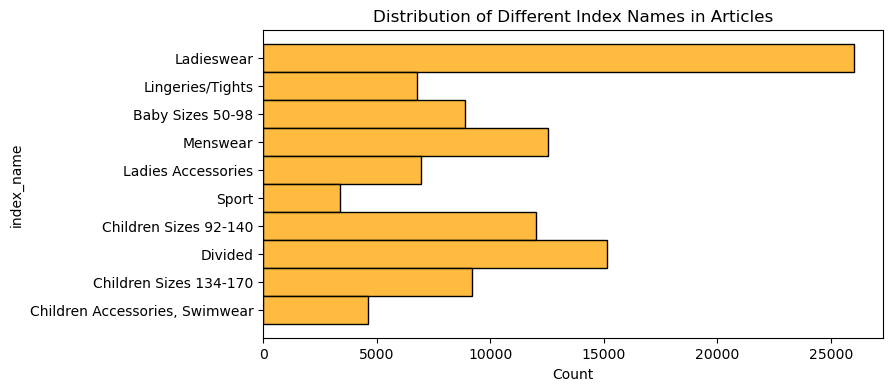

In [5]:
# Ladieswear accounts for a significant part of all dresses. Sportswear has the least portion.
plt.figure(figsize=(8, 4))
sns.histplot(data=articles, y='index_name', color='orange')
plt.xlabel('Count')
plt.ylabel('index_name')
plt.title('Distribution of Different Index Names in Articles')
plt.show()

In [6]:
print('\n================ Value Counts ================\n')
print(articles['garment_group_name'].value_counts())
print('\n================ Ratio ================\n')
print(articles['garment_group_name'].value_counts() / len(articles))


================ Value Counts ================

garment_group_name
Jersey Fancy                     21445
Accessories                      11519
Jersey Basic                      8126
Knitwear                          7490
Under-, Nightwear                 7441
Trousers                          6727
Blouses                           5838
Shoes                             5145
Dresses Ladies                    4874
Outdoor                           4501
Unknown                           3873
Trousers Denim                    3100
Swimwear                          2787
Socks and Tights                  2272
Shirts                            2116
Woven/Jersey/Knitted mix Baby     1965
Shorts                            1559
Dresses/Skirts girls              1541
Skirts                            1254
Special Offers                    1061
Dressed                            908
Name: count, dtype: int64

================ Ratio ================

garment_group_name
Jersey Fancy              

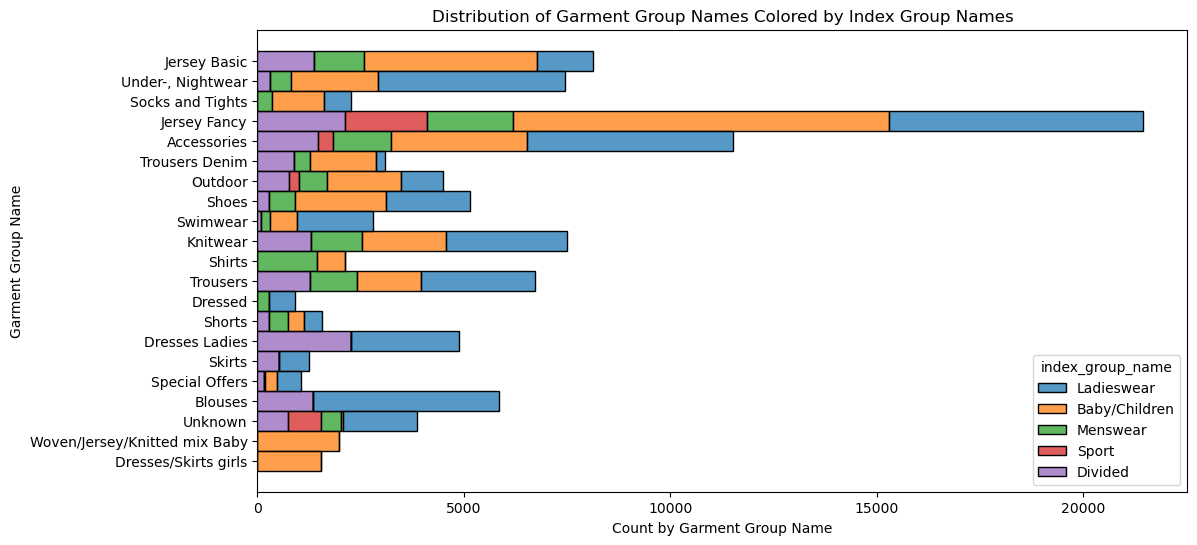

In [7]:
# The garments grouped by index: Jersey fancy is the most frequent garment, especially for women and children. 
# The next by number is accessories, many various accessories with low price.
plt.figure(figsize=(12, 6))
sns.histplot(data=articles, y='garment_group_name', hue='index_group_name', multiple='stack')
plt.xlabel('Count by Garment Group Name')
plt.ylabel('Garment Group Name')
plt.title('Distribution of Garment Group Names Colored by Index Group Names')
plt.show()

In [8]:
# Pay attention to index group-index structure. Ladieswear and Children/Baby have subgroups.
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

In [9]:
# Look at the product group-product structure. 
# Accessories are really various, the most numerious: bags, earrings and hats. However, trousers prevail.
# pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name   product_type_name
Accessories          Accessories set         7
                     Alice band              6
                     Baby Bib                3
                     Bag                  1280
                     Beanie                 56
                                          ... 
Underwear            Underwear corset        7
                     Underwear set          47
Underwear/nightwear  Sleep Bag               6
                     Sleeping sack          48
Unknown              Unknown               121
Name: article_id, Length: 132, dtype: int64

In [10]:
# The table with number of unique values in columns:
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        print(f'# of unique {col}: {articles[col].nunique()}')

# of unique prod_name: 45875
# of unique product_type_name: 131
# of unique product_group_name: 19
# of unique graphical_appearance_name: 30
# of unique colour_group_name: 50
# of unique perceived_colour_value_name: 8
# of unique perceived_colour_master_name: 20
# of unique department_name: 250
# of unique index_name: 10
# of unique index_group_name: 5
# of unique section_name: 56
# of unique garment_group_name: 21
# of unique detail_desc: 43404


### Customers

Customers data description:

`customer_id` : A unique identifier of every customer  
`FN` : 1 or missed  
`Active` : 1 or missed  
`club_member_status` : Status in club  
`fashion_news_frequency` : How often H&M may send news to customer  
`age` : The current age  
`postal_code` : Postal code of customer  

In [11]:
# pd.options.display.max_rows = 50
customers.head()

customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4  25fa5ddee9aac01b35208d01736e57942317d756b32ddd...

In [12]:
# There are no duplicates in `customers`
print(f'duplicates in customers: {len(customers) - customers["customer_id"].nunique()}')

duplicates in customers: 0


In [13]:
# Here we have abnormal number of customers by one postal code. One has 120303, 
# it might be encoded null adress or smth like a huge distribution center, or pickup.
data_postal = customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal.head()

postal_code  customer_id     FN  \
61034   2c29ae653a9282cce4151bd87643c907644e09541abc28...       120303  42874   
281937  cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...          261    109   
156090  714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...          159     90   
171208  7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...          157     55   
126228  5b7eb31eabebd3277de632b82267286d847fd5d44287ee...          156     42   

        Active  club_member_status  fashion_news_frequency     age  
61034    39886              118281                  114377  118002  
281937     104                 261                     261     260  
156090      88                 159                     159     158  
171208      54                 157                     156     156  
126228      41                 156                     156     155

age
21.0    67530
24.0    56124
20.0    55196
25.0    54989
23.0    54867
        ...  
98.0        7
97.0        4
93.0        4
96.0        3
94.0        3
Name: count, Length: 84, dtype: int64


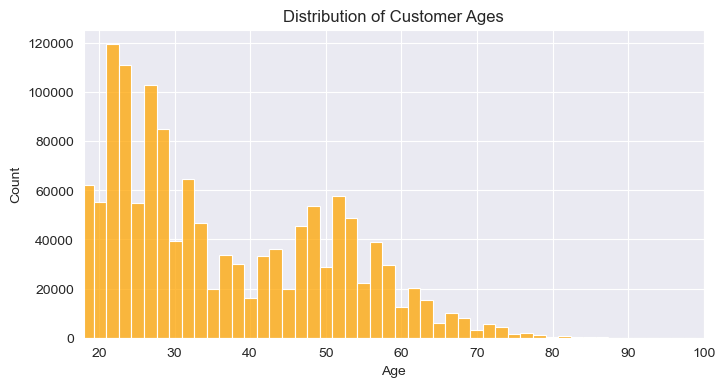

In [14]:
# The most common age is about 21-23
print(customers['age'].value_counts())

sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
sns.histplot(data=customers, x='age', bins=50, color='orange')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Ages')
plt.xlim(18, 100)
plt.show()

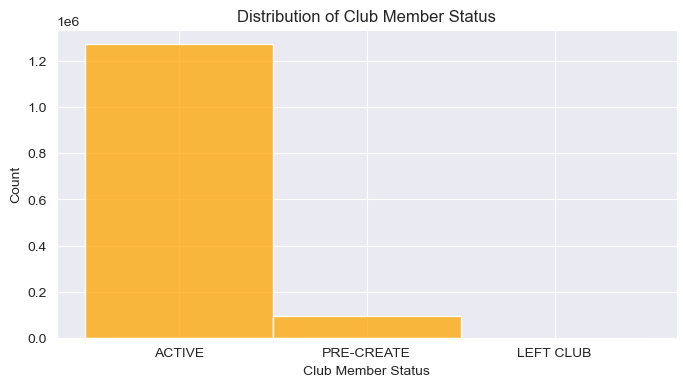

In [15]:
# Status in H&M club. 
# Almost every customer has an active club status, some of them begin to activate it (pre-create). A tiny part of customers abandoned the club.
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
sns.histplot(data=customers, x='club_member_status', color='orange')
plt.xlabel('Club Member Status')
plt.ylabel('Count')
plt.title('Distribution of Club Member Status')
plt.show()

In [16]:
# Here we have three types for NO DATA. Let's unite these values
customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly'], dtype=object)

In [17]:
customers.loc[~customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'
customers['fashion_news_frequency'].unique()

/var/folders/qr/gfg769dx7076s7tkxrwtfg840000gn/T/ipykernel_5431/2595623121.py:1: FutureWarning: Setting a value on a view: behaviour will change in pandas 3.0.
You are mutating a Series or DataFrame object, and currently this mutation will
also have effect on other Series or DataFrame objects that share data with this
object. In pandas 3.0 (with Copy-on-Write), updating one Series or DataFrame object
will never modify another.

  customers.loc[~customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'


array(['None', 'Regularly', 'Monthly'], dtype=object)

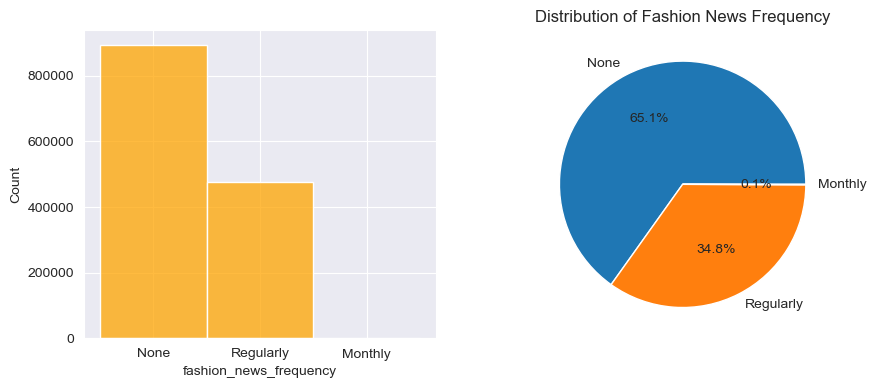

In [18]:
pie_data = customers['fashion_news_frequency'].value_counts()

f, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.histplot(data=customers, x='fashion_news_frequency', color='orange', ax=axes[0])
axes[1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%')
plt.title('Distribution of Fashion News Frequency')
plt.show()

### Transactions

Transactions data description:

`t_dat` : Transaction date.  
`customer_id` : A unique identifier of every customer (in customers table).  
`article_id` : A unique identifier of every article (in articles table).  
`price` : Price of purchase.  
`sales_channel_id` : 1 or 2.  

In [19]:
transactions.head()

t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2  
2  0.015237                 2  
3  0.016932                 2  
4  0.016932                 2

In [20]:
# Here we see outliers for price.
pd.set_option('display.float_format', '{:.4f}'.format)
transactions.describe()['price']

count   31788324.0000
mean           0.0278
std            0.0192
min            0.0000
25%            0.0158
50%            0.0254
75%            0.0339
max            0.5915
Name: price, dtype: float64

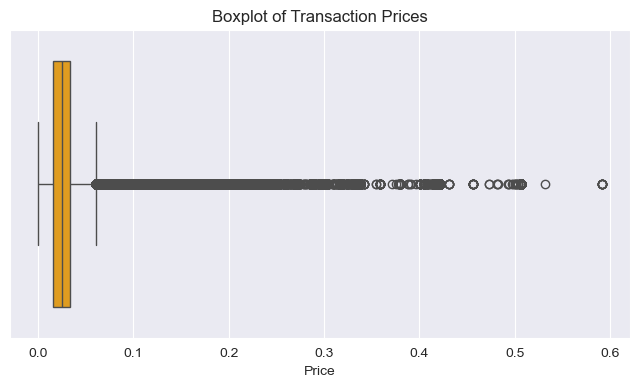

In [21]:
plt.figure(figsize=(8, 4))
sns.set_style("darkgrid")
sns.boxplot(data=transactions, x='price', color='orange')
plt.xlabel('Price')
plt.title('Boxplot of Transaction Prices')
plt.show()

In [22]:
# Top 10 customers by num of transactions.
top_customers = transactions['customer_id'].value_counts().head(10)
top_customers

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
Name: count, dtype: int64

In [23]:
# However, comparing prices inside groups is more accurate, because accessories and trousers prices may vary largerly.
# Get subset from articles and merge it to transactions.
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]
articles_for_merge = transactions[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

In [24]:
articles_for_merge.head()

customer_id  article_id  price  \
0  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001 0.0508   
1  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023 0.0305   
2  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004 0.0152   
3  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003 0.0169   
4  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004 0.0169   

        t_dat                 prod_name product_type_name  product_group_name  \
0  2018-09-20  Atlanta Push Body Harlow    Underwear body           Underwear   
1  2018-09-20   Rae Push (Melbourne) 2p               Bra           Underwear   
2  2018-09-20               Inca Jumper           Sweater  Garment Upper body   
3  2018-09-20      W YODA KNIT OL OFFER           Sweater  Garment Upper body   
4  2018-09-20      W YODA KNIT OL OFFER           Sweater  Garment Upper body   

         index_name  
0  Lingeries/Tights  
1  Lingeries/Tights  
2           Divided  
3        Ladieswear  
4        Ladieswear

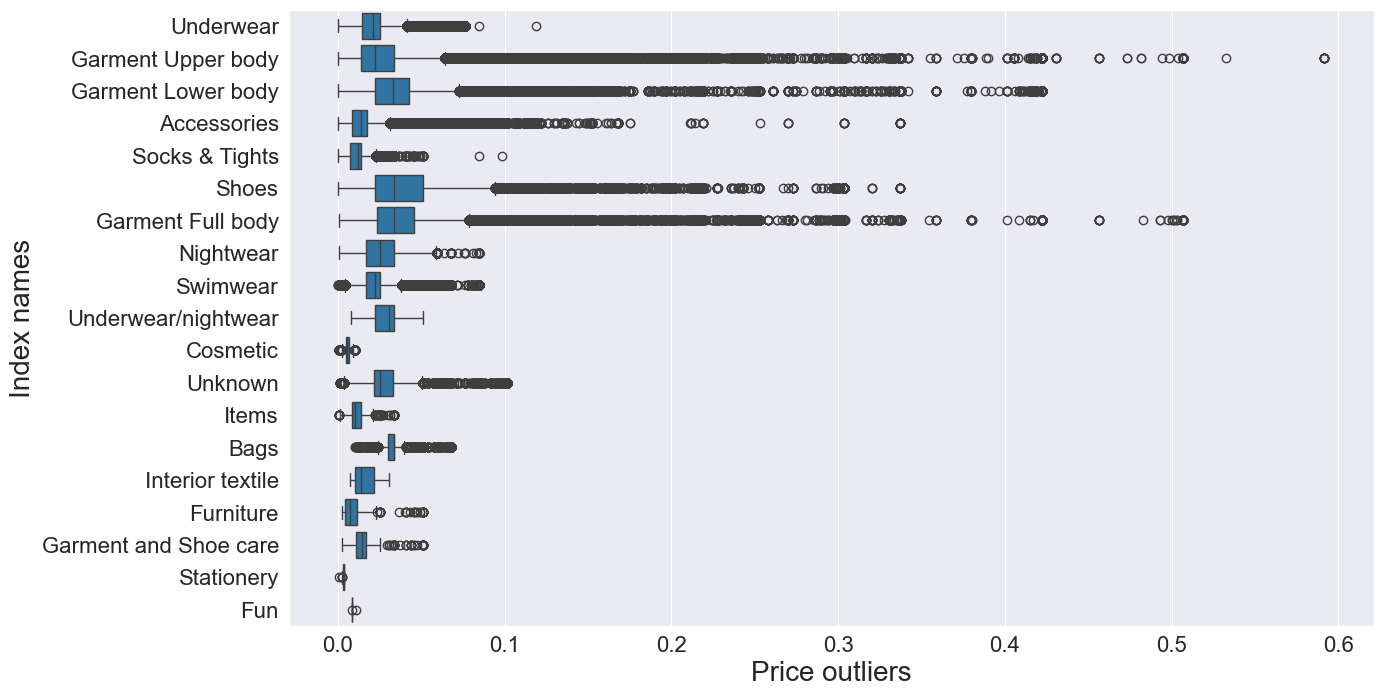

In [25]:
# Here we see outliers for group name prices. Lower/Upper/Full body have a huge price variance. 
# It could be like some unique collections, relative to casual ones. Some high price articles even belong to accessories group.
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(14,8))
ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=20)
ax.set_ylabel('Index names', fontsize=20)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.show()

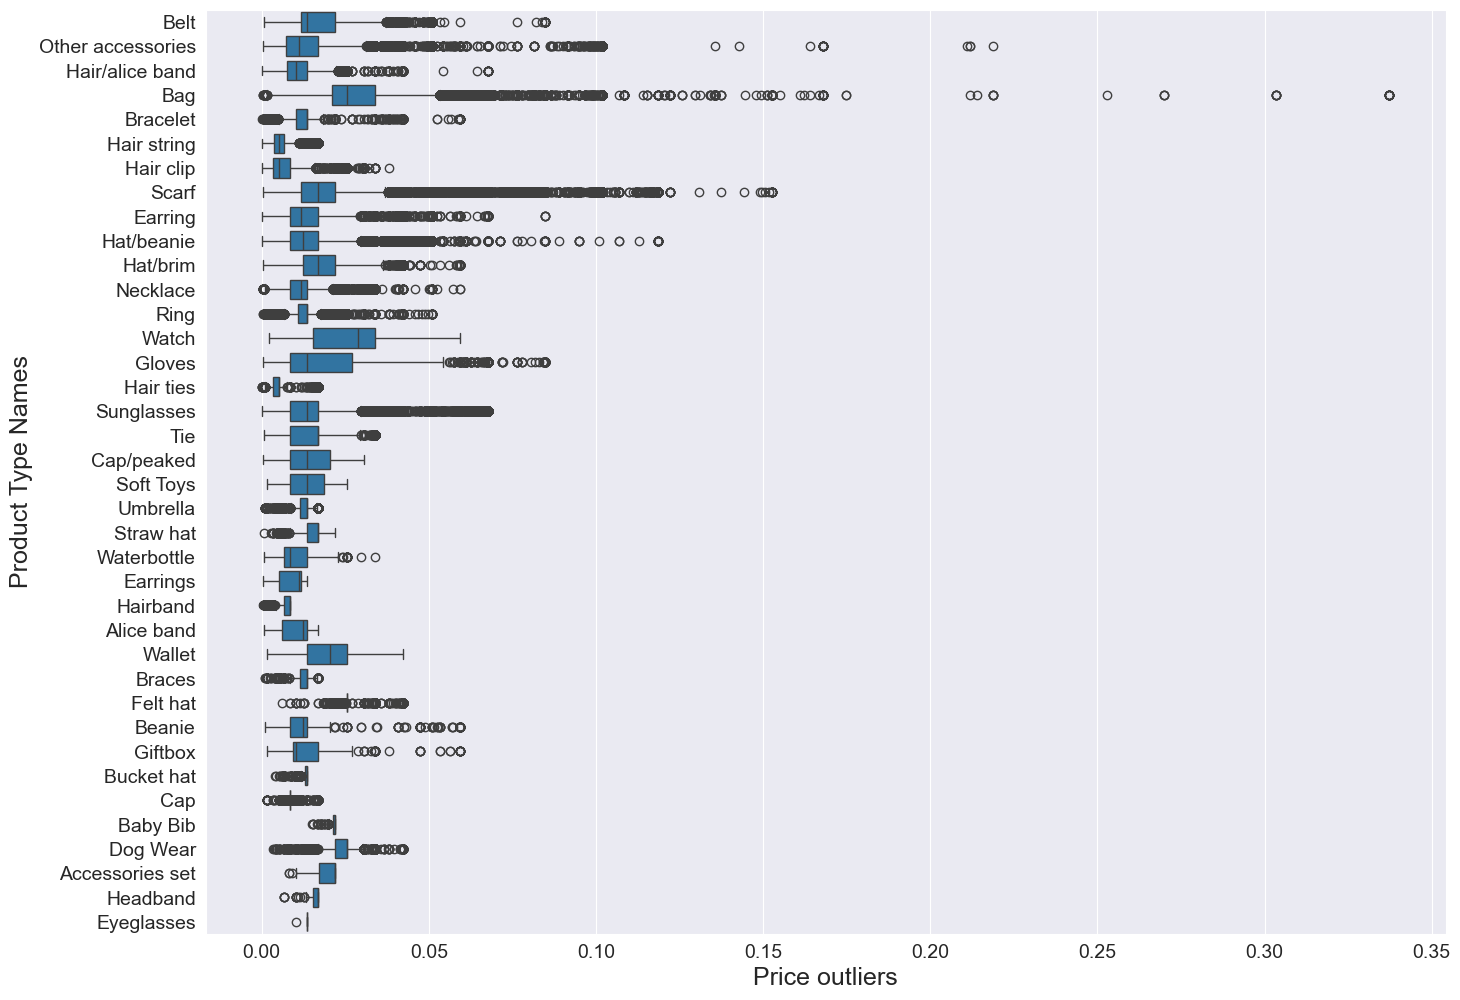

In [26]:
# Look at boxplot prices according to accessories product group and find the reasons of high prices inside group.
# The largest outliers can be found among bags, which is logical enough. 
# In addition, scarves and other accessories have articles with prices highly contrasting to the rest of garments.
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(16, 12))
_ = articles_for_merge[articles_for_merge['product_group_name']=='Accessories']
ax = sns.boxplot(data=_, x='price', y='product_type_name')
ax.set_xlabel('Price outliers', fontsize=18)
ax.set_ylabel('Product Type Names', fontsize=18)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.show()

                                price
index_name                           
Ladieswear                     0.0328
Sport                          0.0288
Menswear                       0.0275
Divided                        0.0265
Ladies Accessories             0.0240
Children Sizes 134-170         0.0219
Lingeries/Tights               0.0208
Children Accessories, Swimwear 0.0176
Children Sizes 92-140          0.0175
Baby Sizes 50-98               0.0175


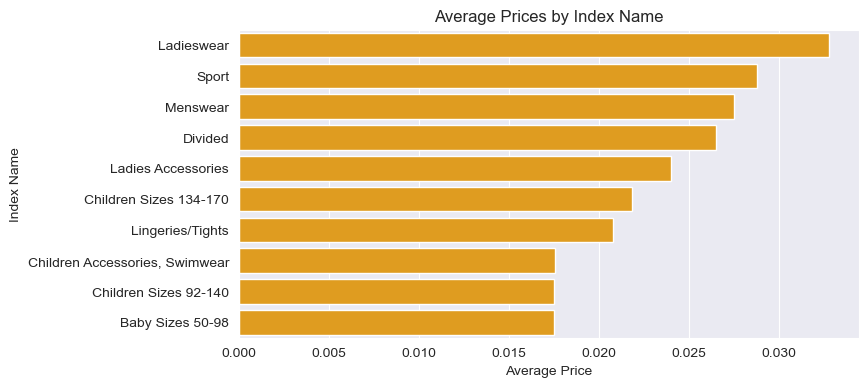

In [27]:
# The index with the highest mean price is Ladieswear. With the lowest - children's wear.
articles_index = articles_for_merge[['index_name', 'price']].groupby('index_name').mean().sort_values('price', ascending=False)
print(articles_index)

sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
sns.barplot(data=articles_index, y=articles_index.index, x='price', color='orange')
plt.xlabel('Average Price')
plt.ylabel('Index Name')
plt.title('Average Prices by Index Name')
plt.show()

                       price
product_group_name          
Shoes                 0.0387
Garment Full body     0.0362
Bags                  0.0333
Garment Lower body    0.0329
Underwear/nightwear   0.0279
Garment Upper body    0.0270
Unknown               0.0268
Nightwear             0.0254
Swimwear              0.0223
Underwear             0.0212
Garment and Shoe care 0.0175
Interior textile      0.0164
Accessories           0.0156
Socks & Tights        0.0114
Items                 0.0113
Furniture             0.0096
Fun                   0.0089
Cosmetic              0.0058
Stationery            0.0032


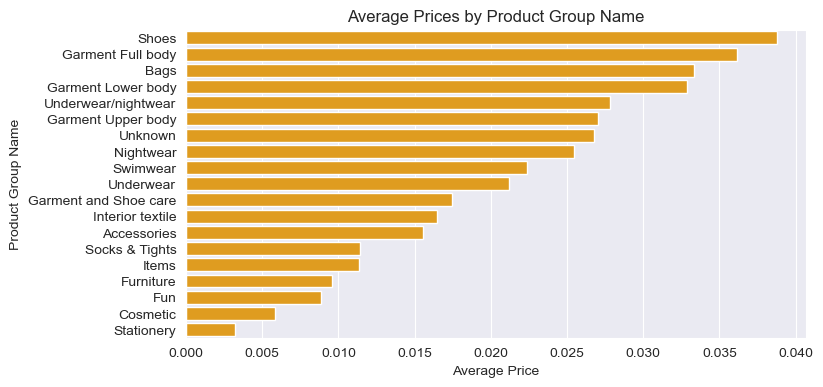

In [28]:
# Stationery has the lowest mean price, the highest - shoes.
articles_index = articles_for_merge[['product_group_name', 'price']].groupby('product_group_name').mean().sort_values('price', ascending=False)
print(articles_index)

sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
sns.barplot(data=articles_index, y=articles_index.index, x='price', color='orange')
plt.xlabel('Average Price')
plt.ylabel('Product Group Name')
plt.title('Average Prices by Product Group Name')
plt.show()

In [29]:
articles_for_merge.dtypes

customer_id            object
article_id              int64
price                 float64
t_dat                  object
prod_name              object
product_type_name      object
product_group_name     object
index_name             object
dtype: object

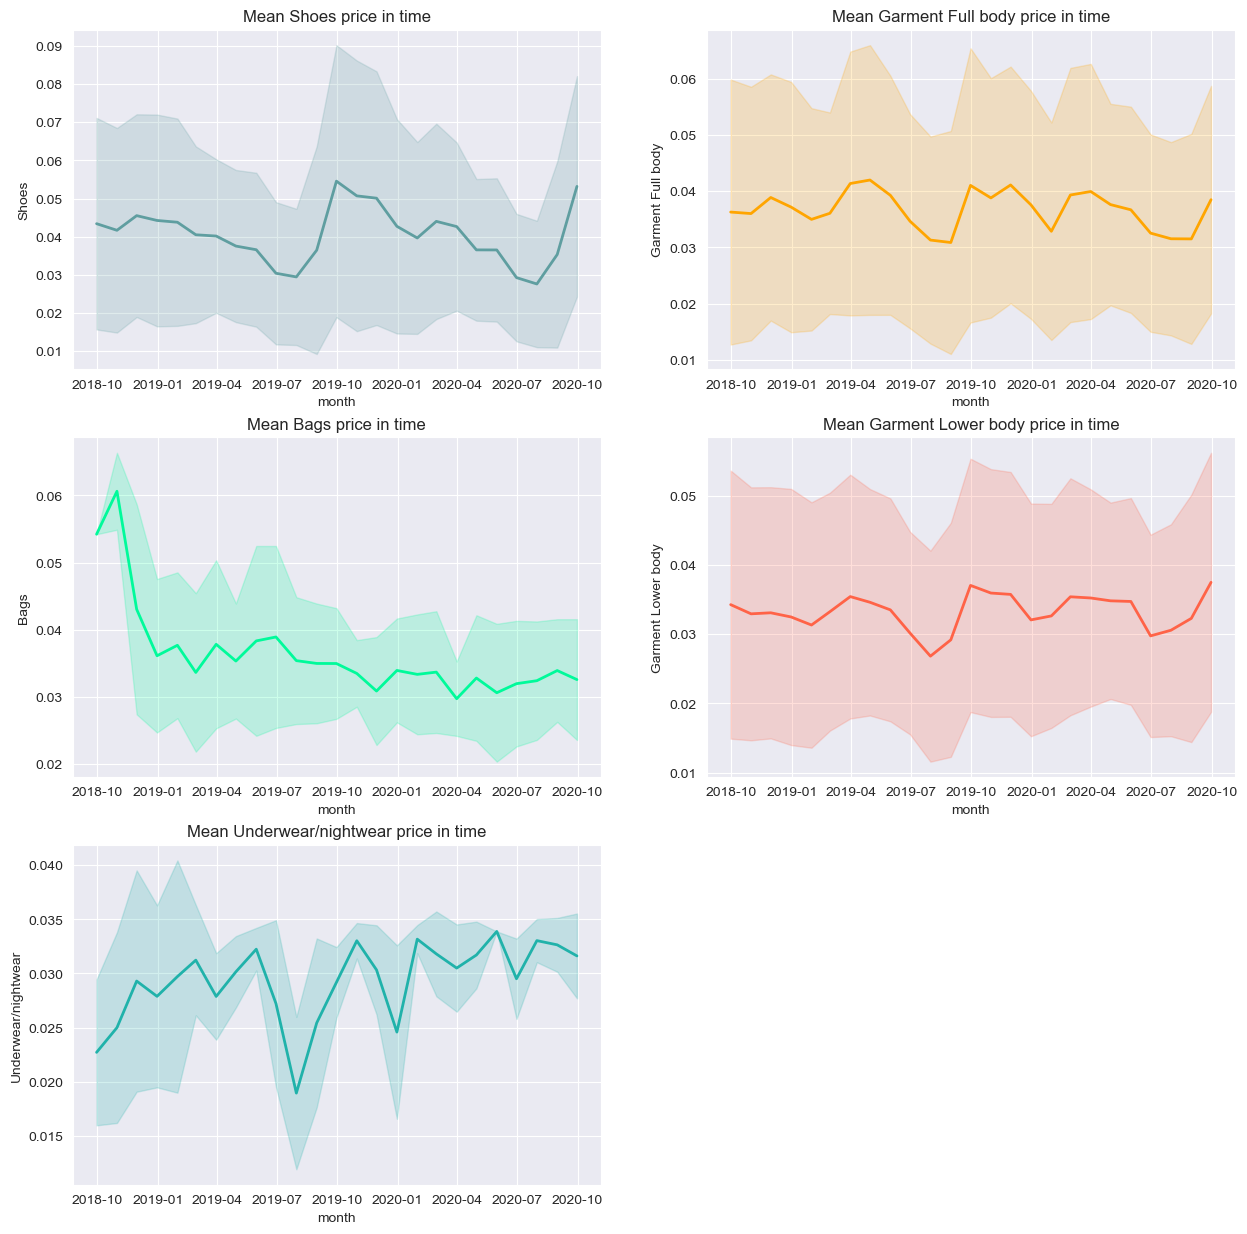

In [ ]:
# Check the mean price change in time for top 5 product groups by mean price: 
# Shoes, Garment Full body, Bags, Garment Lower body, Underwear/nightwear
product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']

f, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
k = 0
for i in range(3):
    for j in range(2):
        try:
            product = articles_for_merge[articles_for_merge['product_group_name']==product_list[k]]
            product['t_dat'] = pd.to_datetime(product['t_dat'])
            product_mean = product[['t_dat', 'price']].groupby(pd.Grouper(key='t_dat', freq='ME')).mean().fillna(0)
            product_std = product[['t_dat', 'price']].groupby(pd.Grouper(key='t_dat', freq='ME')).std().fillna(0)

            axes[i, j].plot(product_mean, linewidth=2, color=colors[k])
            axes[i, j].fill_between(product_mean.index, product_mean['price'] - product_std['price'], product_mean['price'] + product_std['price'], color=colors[k], alpha=0.2)
            axes[i, j].set_title(f'Mean {product_list[k]} price in time')
            axes[i, j].set_xlabel('month')
            axes[i, j].set_ylabel(f'{product_list[k]}')
            k += 1
        except IndexError:
            axes[i, j].set_visible(False)
plt.show()


### Images with description and price

In [31]:
import matplotlib.image as mpimg

In [32]:
# Let's check the last purchases by max price and by min price
max_price_ids = transactions[transactions.t_dat==transactions.t_dat.max()].sort_values('price', ascending=False).iloc[:5][['article_id', 'price']]
min_price_ids = transactions[transactions.t_dat==transactions.t_dat.min()].sort_values('price', ascending=True).iloc[:5][['article_id', 'price']]
max_price_ids

article_id  price
31761309   916300001 0.5068
31777419   780031004 0.4220
31777418   780031004 0.4220
31777417   780031001 0.4220
31770379   916295002 0.4220

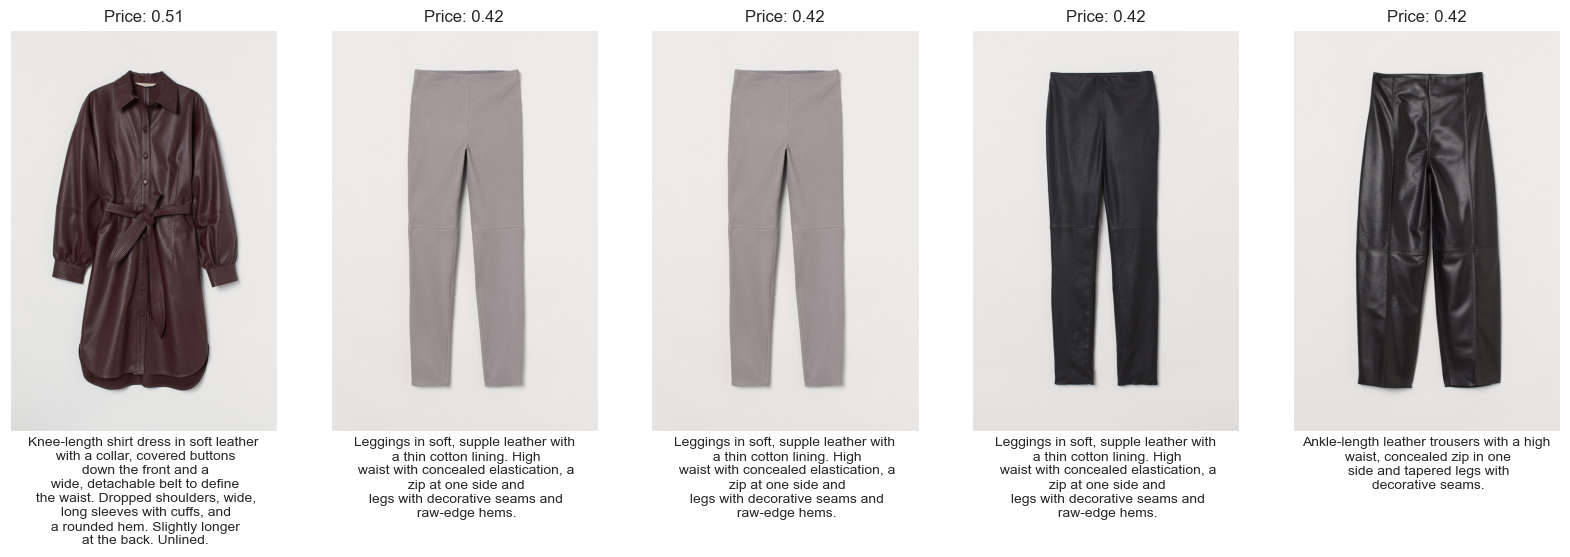

In [33]:
# Photos with description and price (top 5 max)
f, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))
i = 0
for _, data in max_price_ids.iterrows():
    desc = articles[articles['article_id']==data['article_id']]['detail_desc'].values[0]
    
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 5 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    
    img = mpimg.imread(f'./data/h-and-m-personalized-fashion-recommendations/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    axes[i].imshow(img)
    axes[i].set_title(f'Price: {data.price:.2f}')
    axes[i].set_xlabel(desc, fontsize=10)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].grid(False)
    i += 1


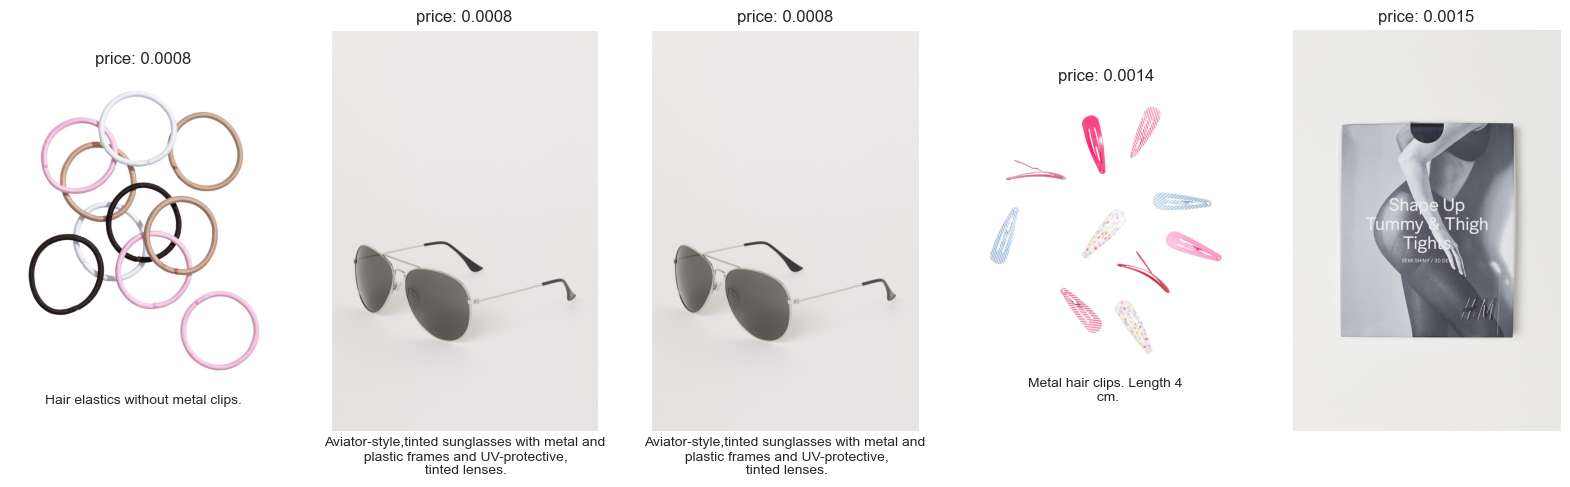

In [34]:
# Photos with description and price (top 5 min)
f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in min_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 4 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)

    img = mpimg.imread(f'./data/h-and-m-personalized-fashion-recommendations/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.4f}')
    ax[i].set_xlabel(desc, fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].grid(False)
    i += 1
plt.axis('off')
plt.show()

## Data Analysis

In [46]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime
from PIL import Image

In [36]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return tt

In [37]:
missing_data(articles)

Total  Percent
detail_desc                     416   0.3942
perceived_colour_master_name      0   0.0000
garment_group_name                0   0.0000
garment_group_no                  0   0.0000
section_name                      0   0.0000
section_no                        0   0.0000
index_group_name                  0   0.0000
index_group_no                    0   0.0000
index_name                        0   0.0000
index_code                        0   0.0000
department_name                   0   0.0000
department_no                     0   0.0000
article_id                        0   0.0000
product_code                      0   0.0000
perceived_colour_value_name       0   0.0000
perceived_colour_value_id         0   0.0000
colour_group_name                 0   0.0000
colour_group_code                 0   0.0000
graphical_appearance_name         0   0.0000
graphical_appearance_no           0   0.0000
product_group_name                0   0.0000
product_type_name                 0   0.0000
product_type_no                   0   0.0000
prod_name                         0   0.0000
perceived_colour_master_id        0   0.0000

In [38]:
missing_data(customers)

Total  Percent
Active                  907576  66.1508
FN                      895050  65.2378
age                      15861   1.1561
club_member_status        6062   0.4418
customer_id                  0   0.0000
fashion_news_frequency       0   0.0000
postal_code                  0   0.0000

In [39]:
missing_data(transactions)

Total  Percent
t_dat                 0   0.0000
customer_id           0   0.0000
article_id            0   0.0000
price                 0   0.0000
sales_channel_id      0   0.0000

In [40]:
unique_values(articles)

Total  Uniques
article_id                    105542   105542
product_code                  105542    47224
prod_name                     105542    45875
product_type_no               105542      132
product_type_name             105542      131
product_group_name            105542       19
graphical_appearance_no       105542       30
graphical_appearance_name     105542       30
colour_group_code             105542       50
colour_group_name             105542       50
perceived_colour_value_id     105542        8
perceived_colour_value_name   105542        8
perceived_colour_master_id    105542       20
perceived_colour_master_name  105542       20
department_no                 105542      299
department_name               105542      250
index_code                    105542       10
index_name                    105542       10
index_group_no                105542        5
index_group_name              105542        5
section_no                    105542       57
section_name                  105542       56
garment_group_no              105542       21
garment_group_name            105542       21
detail_desc                   105126    43404

We observe that features for which we expect to have the same number of unique value, like:

product_type_no and product_type_name,  
departmant_no and department_name,  
section_no and section_name have different number of unique values, which might means that we might have categories with same name. Others, like:  
index_code and index_name,  
garment_group_no and garment_group_name have the same number of unique values.  

In [41]:
unique_values(customers)

Total  Uniques
customer_id             1371980  1371980
FN                       476930        1
Active                   464404        1
club_member_status      1365918        3
fashion_news_frequency  1371980        3
age                     1356119       84
postal_code             1371980   352899

In [42]:
unique_values(transactions)

Total  Uniques
t_dat             31788324      734
customer_id       31788324  1362281
article_id        31788324   104547
price             31788324     9857
sales_channel_id  31788324        2

We observe that not all the customers in customer data appears as having transactions in transaction train data. As well, not all articles are represented in this data. It is interesting that the number of different prices is quite small, out of 31.7M transactions, and for 1.3M customers, buying 104K different articles. Same for the dates, there are only 734 different dates. Let's check some stats here.

In [43]:
print(f"Percent of articles present in transactions: {round(104547/105542,3)*100}%")
print(f"Percent of articles present in transactions: {round(1362281/1371980,3)*100}%")

Percent of articles present in transactions: 99.1%
Percent of articles present in transactions: 99.3%


In [44]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

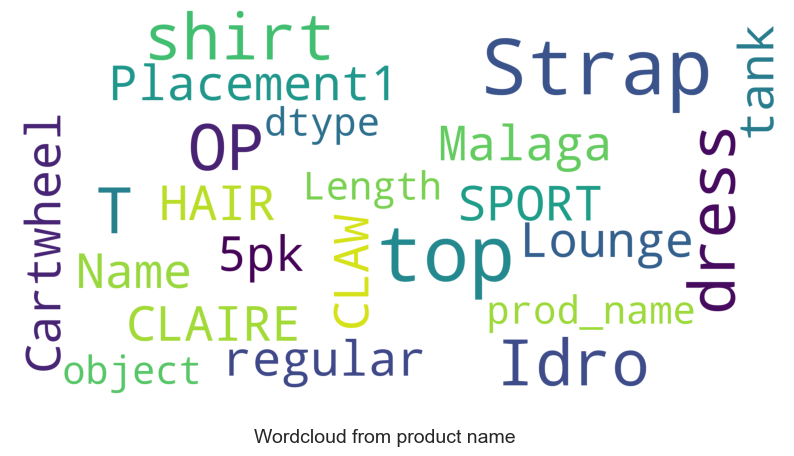

In [45]:
show_wordcloud(articles["prod_name"], "Wordcloud from product name")

/var/folders/qr/gfg769dx7076s7tkxrwtfg840000gn/T/ipykernel_5431/443032371.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


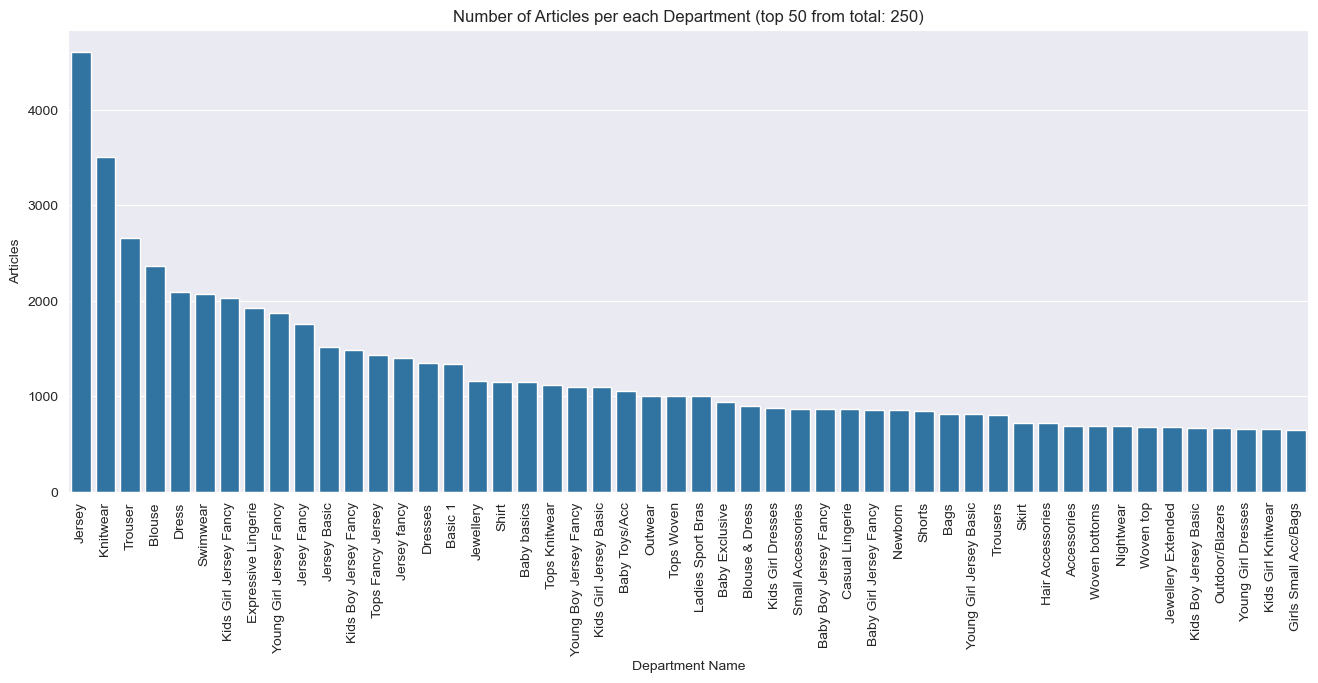

In [47]:
temp = articles.groupby(["department_name"])["article_id"].nunique()
df = pd.DataFrame({'Department Name': temp.index,
                   'Articles': temp.values
                  })
total_depts = len(df['Department Name'].unique())
df = df.sort_values(['Articles'], ascending=False).head(50)
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Department (top 50 from total: {total_depts})')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Department Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

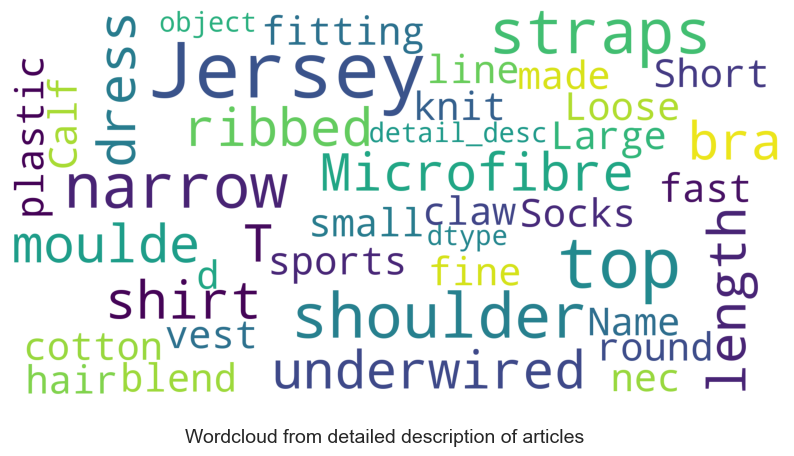

In [48]:
show_wordcloud(articles["detail_desc"], "Wordcloud from detailed description of articles")

/var/folders/qr/gfg769dx7076s7tkxrwtfg840000gn/T/ipykernel_5431/1394748879.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


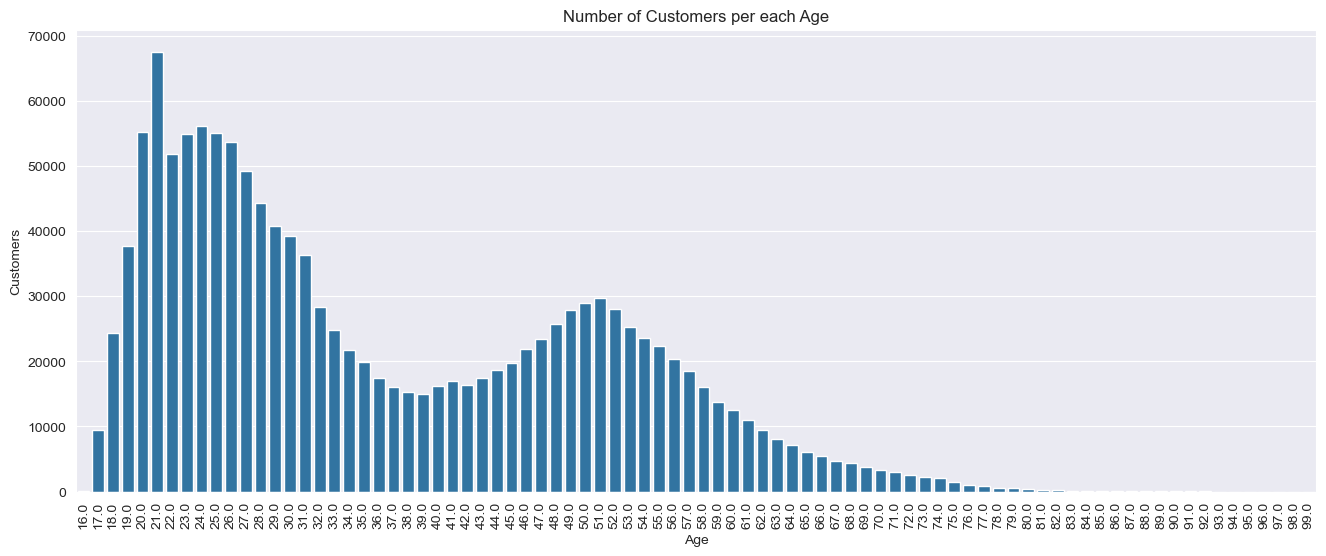

In [86]:
# Customers age distribution
temp = customers.groupby(["age"])["customer_id"].count()
df = pd.DataFrame({'Age': temp.index, 'Customers': temp.values})
df = df.sort_values(['Age'], ascending=False)
plt.figure(figsize = (16,6))
plt.title(f'Number of Customers per each Age')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Age', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()


--- Age and Spending Behavior ---


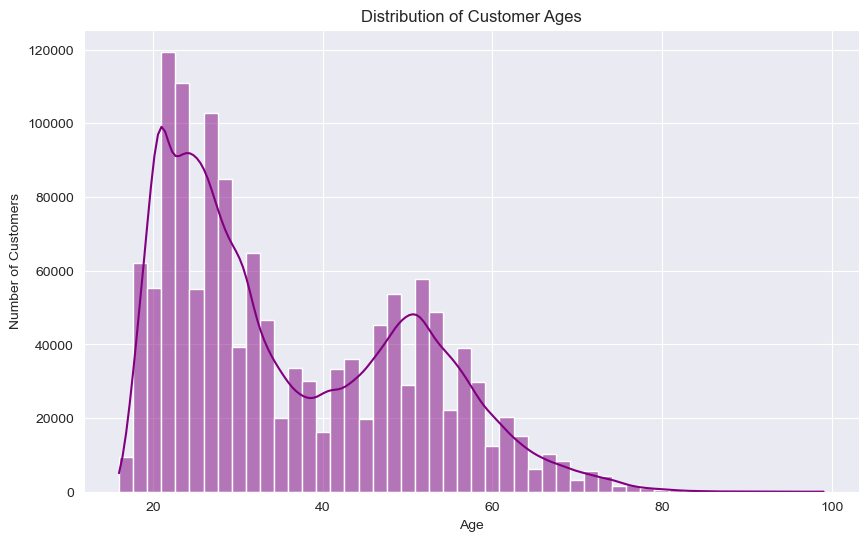

In [87]:
print("\n--- Age and Spending Behavior ---")
plt.figure(figsize=(10, 6))
sns.histplot(customers['age'], bins=50, kde=True, color='purple')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

In [90]:
print("\n--- Merging Dataframes ---")
merged_df = pd.merge(transactions, customers, on='customer_id', how='left')
merged_df = pd.merge(merged_df, articles, on='article_id', how='left')

print("Shape of the merged dataframe:", merged_df.shape)
print("First 5 rows of the merged dataframe:")
print(merged_df.head())
print("Column information of the merged dataframe:")
merged_df.info()

# Create new features
merged_df['t_dat'] = pd.to_datetime(merged_df['t_dat'])
merged_df['sales_month'] = merged_df['t_dat'].dt.to_period('M')
merged_df['sales_dayofweek'] = merged_df['t_dat'].dt.day_name()


--- Merging Dataframes ---
Shape of the merged dataframe: (31788324, 35)
First 5 rows of the merged dataframe:
        t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

   price  sales_channel_id     FN  Active club_member_status  \
0 0.0508                 2    NaN     NaN             ACTIVE   
1 0.0305                 2    NaN     NaN             ACTIVE   
2 0.0152                 2 1.0000  1.0000             ACTIVE   
3 0.0169                 2 1.0000  1.0000             ACTIVE   
4 0.0169                 2 1.0000  1.0000             ACTIVE   

  fashion_news_frequen

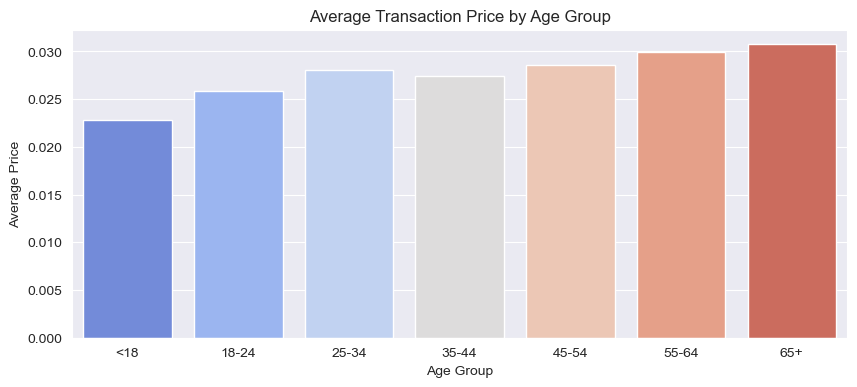

In [98]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
merged_df['age_group'] = pd.cut(merged_df['age'], bins=bins, labels=labels, right=False)

avg_spending_by_age = merged_df.groupby('age_group', observed=False)['price'].mean().sort_index()
plt.figure(figsize=(10, 4))
sns.barplot(x=avg_spending_by_age.index, y=avg_spending_by_age.values, hue=avg_spending_by_age.index, palette='coolwarm')
plt.title('Average Transaction Price by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Price')
plt.show()


--- Seasonality and Day of the Week Analysis ---


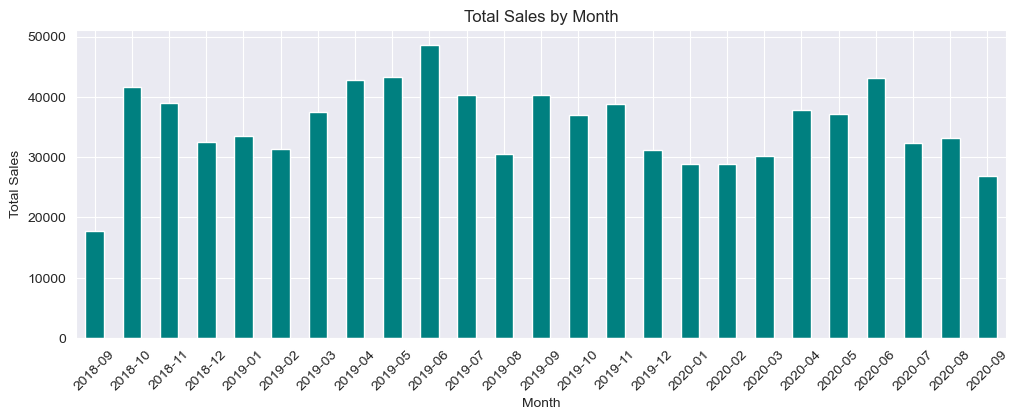

In [97]:
print("\n--- Seasonality and Day of the Week Analysis ---")
# Sales by month
sales_by_month = merged_df.groupby('sales_month')['price'].sum()
plt.figure(figsize=(12, 4))
sales_by_month.plot(kind='bar', title='Total Sales by Month', color='teal')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

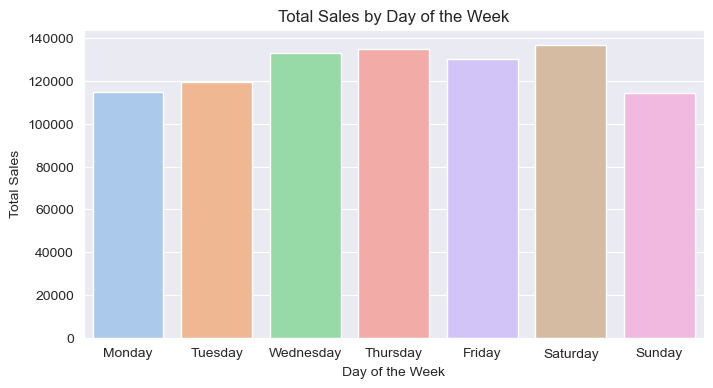

In [102]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = merged_df.groupby('sales_dayofweek')['price'].sum().reindex(day_order)
plt.figure(figsize=(8, 4))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, hue=sales_by_day.index, palette='pastel')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

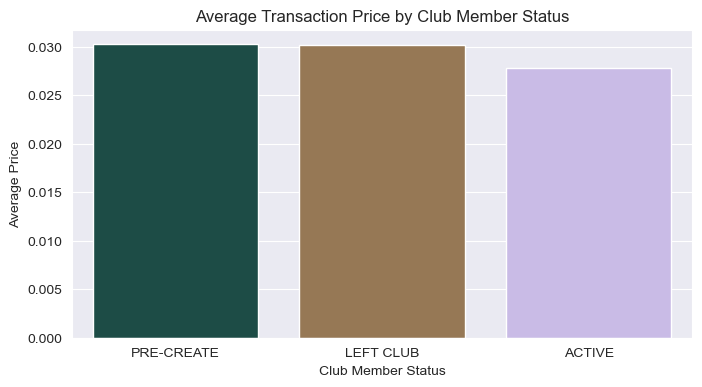

In [103]:
spending_by_club = merged_df.groupby('club_member_status')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=spending_by_club.index, y=spending_by_club.values, hue=spending_by_club.index, palette='cubehelix')
plt.title('Average Transaction Price by Club Member Status')
plt.xlabel('Club Member Status')
plt.ylabel('Average Price')
plt.show()

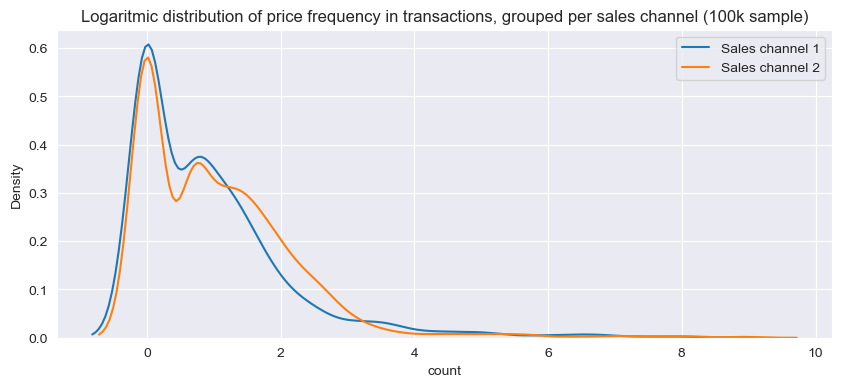

In [54]:
df = transactions.sample(100_000)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.kdeplot(np.log(df.loc[df["sales_channel_id"]==1].price.value_counts()))
sns.kdeplot(np.log(df.loc[df["sales_channel_id"]==2].price.value_counts()))
ax.legend(labels=['Sales channel 1', 'Sales channel 2'])
plt.title("Logaritmic distribution of price frequency in transactions, grouped per sales channel (100k sample)")
plt.show()

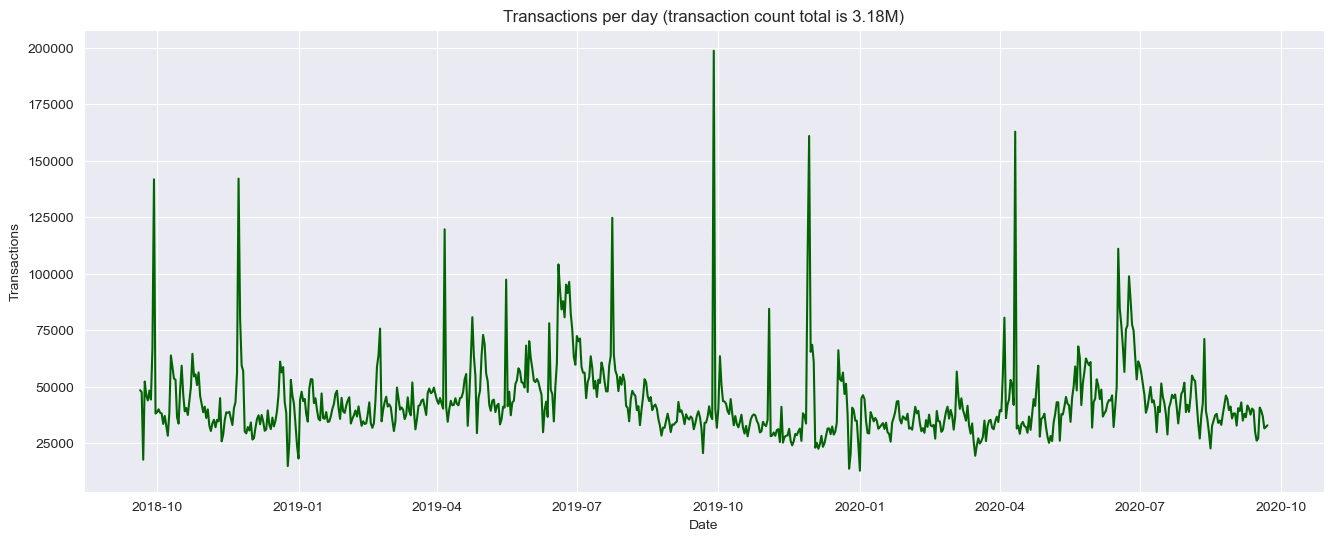

In [58]:
df = transactions.groupby(["t_dat"])["article_id"].count().reset_index()
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.columns = ["Date", "Transactions"]
fig, ax = plt.subplots(1, 1, figsize=(16,6))
plt.plot(df["Date"], df["Transactions"], color="Darkgreen")
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.title(f"Transactions per day (transaction count total is {round(transactions.shape[0]/10.e6,2)}M)")
# plt.title(f"Transactions per day (100k sample; to get the real volume, please consider that real transaction count is {round(transactions.shape[0]/10.e6,2)}M)")
plt.show()

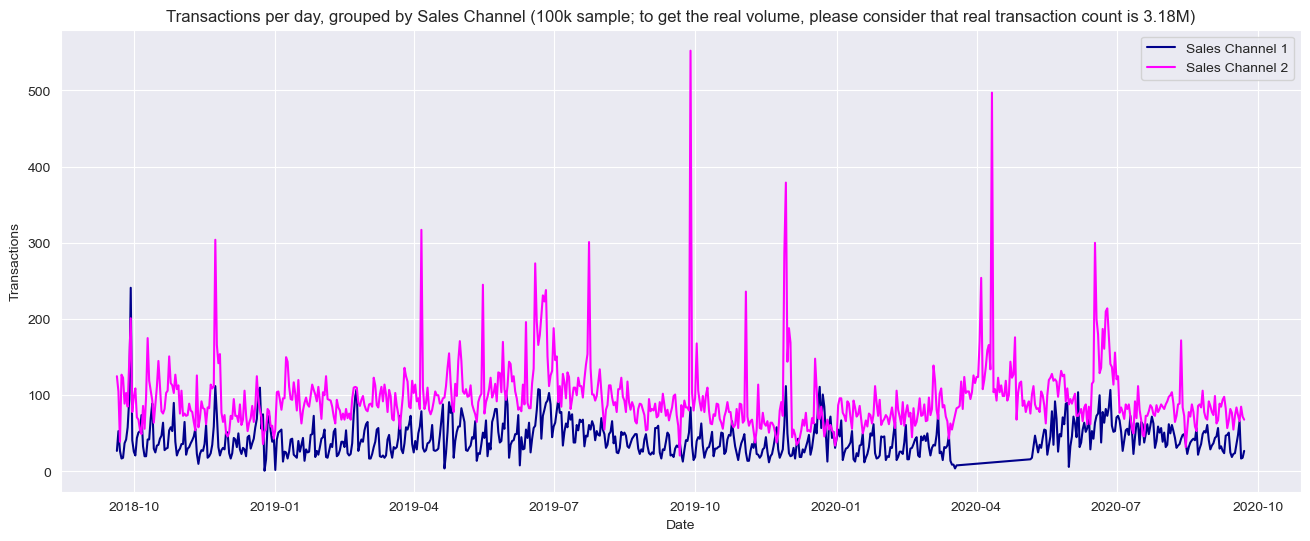

In [59]:
df = transactions.sample(100_000).groupby(["t_dat", "sales_channel_id"])["article_id"].count().reset_index()
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.columns = ["Date", "Sales Channel Id", "Transactions"]
fig, ax = plt.subplots(1, 1, figsize=(16,6))
g1 = ax.plot(df.loc[df["Sales Channel Id"]==1, "Date"], df.loc[df["Sales Channel Id"]==1, "Transactions"], label="Sales Channel 1", color="Darkblue")
g2 = ax.plot(df.loc[df["Sales Channel Id"]==2, "Date"], df.loc[df["Sales Channel Id"]==2, "Transactions"], label="Sales Channel 2", color="Magenta")
plt.xlabel("Date")
plt.ylabel("Transactions")
ax.legend()
plt.title(f"Transactions per day, grouped by Sales Channel (100k sample; to get the real volume, please consider that real transaction count is {round(transactions.shape[0]/10.e6,2)}M)")
plt.show()

In [63]:
# Image Information
total_folders = total_files = 0
folder_info = []
images_names = []
for base, dirs, files in tqdm(os.walk('./data/h-and-m-personalized-fashion-recommendations/')):
    for directories in dirs:
        folder_info.append((directories, len(os.listdir(os.path.join(base, directories)))))
        total_folders += 1
    for _files in files:
        total_files += 1
        if len(_files.split(".jpg"))==2:
            images_names.append(_files.split(".jpg")[0])

print(f"Total number of folders: {total_folders}\nTotal number of files: {total_files}")
folder_info_df = pd.DataFrame(folder_info, columns=["folder", "files count"])
folder_info_df.sort_values(["files count"], ascending=False).head()

print("folder names: ", list(folder_info_df.folder.unique()))

88it [00:00, 248.17it/s]

Total number of folders: 87
Total number of files: 105104
folder names:  ['images', '024', '023', '015', '012', '079', '046', '041', '048', '077', '083', '084', '070', '013', '014', '022', '025', '071', '085', '049', '082', '076', '040', '078', '047', '065', '091', '062', '054', '053', '038', '036', '031', '052', '055', '063', '090', '064', '030', '037', '039', '089', '042', '045', '087', '073', '074', '080', '020', '027', '018', '011', '016', '029', '081', '075', '072', '086', '044', '088', '043', '017', '028', '010', '026', '019', '021', '032', '035', '095', '061', '066', '092', '059', '050', '057', '068', '034', '033', '056', '069', '051', '093', '067', '058', '060', '094']


In [64]:
image_name_df = pd.DataFrame(images_names, columns = ["image_name"])
image_name_df["article_id"] = image_name_df["image_name"].apply(lambda x: int(x[1:]))

image_name_df.head()

image_name  article_id
0  0249136006   249136006
1  0244267027   244267027
2  0244267032   244267032
3  0240670058   240670058
4  0241436001   241436001

In [65]:
image_article_df = articles[["article_id", "product_code", "product_group_name", "product_type_name"]].merge(image_name_df, on=["article_id"], how="left")
print(image_article_df.shape)
image_article_df.head()

(105542, 5)


article_id  product_code  product_group_name product_type_name  image_name
0   108775015        108775  Garment Upper body          Vest top  0108775015
1   108775044        108775  Garment Upper body          Vest top  0108775044
2   108775051        108775  Garment Upper body          Vest top  0108775051
3   110065001        110065           Underwear               Bra  0110065001
4   110065002        110065           Underwear               Bra  0110065002

In [66]:
# Products without image
article_no_image_df = image_article_df.loc[image_article_df.image_name.isna()]
print(article_no_image_df.shape)
article_no_image_df.head()

(442, 5)


article_id  product_code  product_group_name         product_type_name  \
88    174057028        174057           Nightwear  Pyjama jumpsuit/playsuit   
117   179208001        179208  Garment Lower body           Leggings/Tights   
258   212042043        212042               Shoes                  Sneakers   
259   212042066        212042               Shoes                  Sneakers   
261   212629004        212629   Garment Full body                     Dress   

    image_name  
88         NaN  
117        NaN  
258        NaN  
259        NaN  
261        NaN

In [67]:
print("Product codes with some missing images: ", article_no_image_df.product_code.nunique())
print("Product groups with some missing images: ", list(article_no_image_df.product_group_name.unique()))

Product codes with some missing images:  372
Product groups with some missing images:  ['Nightwear', 'Garment Lower body', 'Shoes', 'Garment Full body', 'Accessories', 'Garment Upper body', 'Underwear', 'Socks & Tights', 'Swimwear', 'Cosmetic']


In [68]:
def plot_image_samples(image_article_df, product_group_name, cols=1, rows=-1):
    image_path = "./data/h-and-m-personalized-fashion-recommendations/images/"
    _df = image_article_df.loc[image_article_df.product_group_name==product_group_name]
    article_ids = _df.article_id.values[0:cols*rows]
    plt.figure(figsize=(2 + 3 * cols, 2 + 4 * rows))
    for i in range(cols * rows):
        article_id = ("0" + str(article_ids[i]))[-10:]
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        plt.title(f"{product_group_name} {article_id[:3]}\n{article_id}.jpg")
        image = Image.open(f"{image_path}{article_id[:3]}/{article_id}.jpg")
        plt.imshow(image)

In [69]:
# Let's choose from some product group name 
print(image_article_df.product_group_name.unique())

['Garment Upper body' 'Underwear' 'Socks & Tights' 'Garment Lower body'
 'Accessories' 'Items' 'Nightwear' 'Unknown' 'Underwear/nightwear' 'Shoes'
 'Swimwear' 'Garment Full body' 'Cosmetic' 'Interior textile' 'Bags'
 'Furniture' 'Garment and Shoe care' 'Fun' 'Stationery']


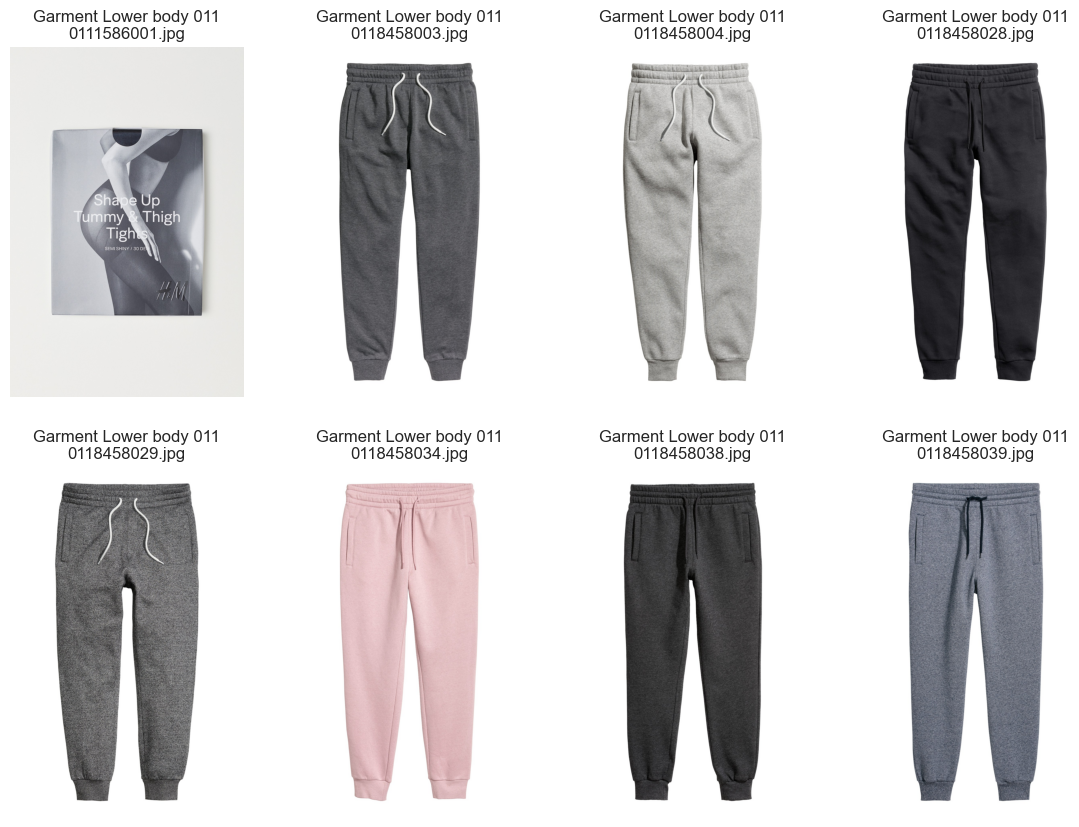

In [70]:
plot_image_samples(image_article_df, "Garment Lower body", 4, 2)

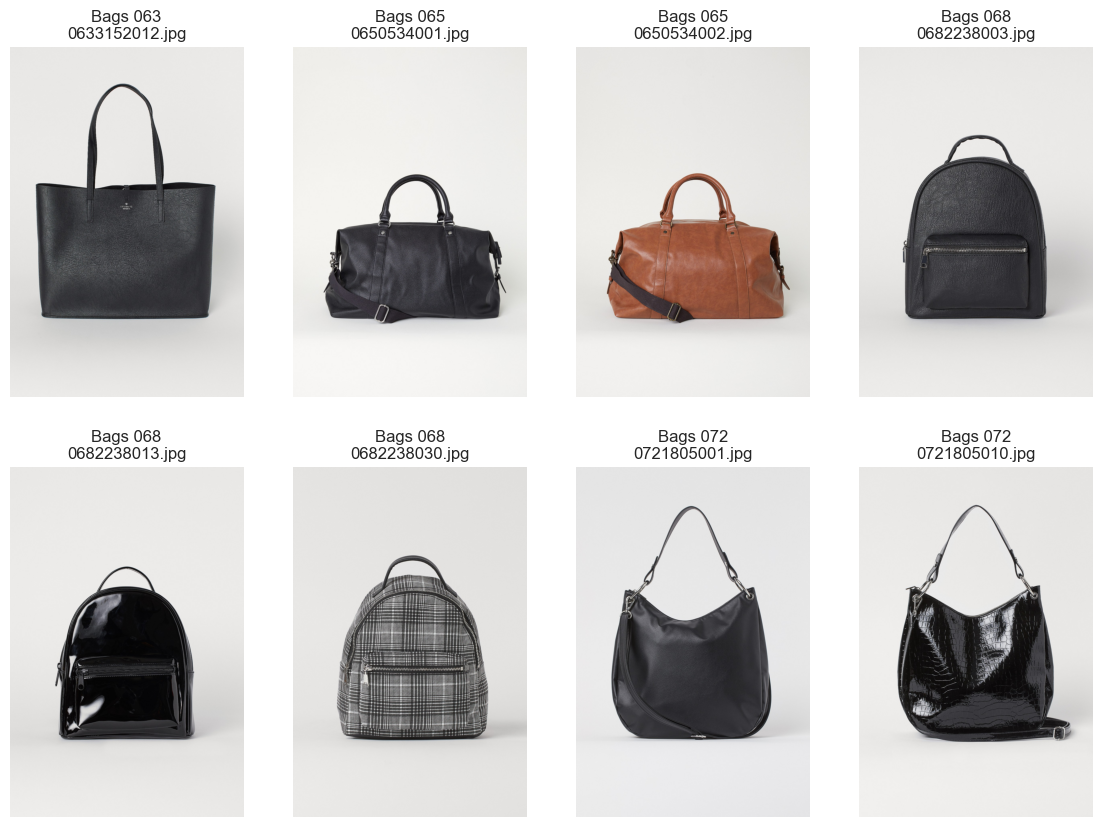

In [72]:
plot_image_samples(image_article_df, "Bags", 4, 2)

### Simple Prediction

For this initial submission, we apply the following simplified logic:

if there are articles for a certain client, pick the most recent buys;  
if there are not articles for a certain client, just pick the most frequently buyed articles.  

In [73]:
transactions_train_df = transactions.sort_values(["customer_id", "t_dat"], ascending=False)
transactions_train_df.head()

t_dat                                        customer_id  \
19867243  2019-12-04  ffffd9ac14e89946416d80e791d064701994755c3ab686...   
27806865  2020-06-22  ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...   
25077914  2020-04-25  ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...   
24375394  2020-04-09  ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...   
24375395  2020-04-09  ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...   

          article_id  price  sales_channel_id  
19867243   806050001 0.0847                 2  
27806865   882810001 0.0169                 1  
25077914   866755002 0.0508                 2  
24375394   866755002 0.0432                 2  
24375395   840360003 0.0135                 2

In [74]:
last_date = transactions_train_df.t_dat.max()
print(last_date)
print(transactions_train_df.loc[transactions_train_df.t_dat==last_date].shape)

2020-09-22
(32866, 5)


In [75]:
most_frequent_articles = list(transactions_train_df.loc[transactions_train_df.t_dat==last_date].article_id.value_counts()[0:12].index)
art_list = []
for art in most_frequent_articles:
    art = "0"+str(art)
    art_list.append(art)
art_str = " ".join(art_list)
print("Frequent articles bought recently: ", art_str)

Frequent articles bought recently:  0924243002 0751471001 0448509014 0918522001 0866731001 0714790020 0788575004 0915529005 0573085028 0918292001 0850917001 0928206001


In [76]:
agg_df = transactions_train_df.groupby(["customer_id"])["article_id"].agg(lambda x: str(x.values[0:12])[1:-1]).reset_index()

In [77]:
# padding a '0' in front of every article name to follow the same name convention from dataset
def padding_articles(x):
    if x:
        xl = x.split()
        x = []
        for xi in xl:
            x.append("0"+xi)
        dimm_x = len(x)
        if dimm_x < 12:
            x.extend(art_list[:12-dimm_x])
        return(" ".join(x))

In [114]:
agg_df["article_id"] = agg_df["article_id"].apply(lambda x: padding_articles(x))

sample_submission = pd.read_csv("./data/h-and-m-personalized-fashion-recommendations/sample_submission.csv")
print("Aggregated transaction history: ", agg_df.customer_id.nunique())
print("Submission sample: ", sample_submission.customer_id.nunique())

Aggregated transaction history:  1362281
Submission sample:  1371980


In [115]:
# For the customers with missing articles, we simply replace with most frequent buyed articles in most recent day(s).
submission_df = agg_df.merge(sample_submission[["customer_id"]], how="right")
submission_df.columns = ["customer_id", "prediction"]
print(submission_df.shape)
submission_df.head()

(1371980, 2)


customer_id  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...   

                                          prediction  
0  00568601043 00841260003 00887593002 0089049800...  
1  00826211002 00599580055 00599580055 0081183500...  
2  00794321007 00858883002 00851400006 0075042401...  
3  00742079001 00732413001 00924243002 0075147100...  
4  00896152002 00730683050 00927530004 0079158701...

In [80]:
print("Rows with missing data in submission: ", submission_df.loc[submission_df.prediction.isna()].shape[0])

# We replace the missing data with the most frequently bought articles, from recent days. We calculated it before.
submission_df.loc[submission_df.prediction.isna(), ["prediction"]] = art_str

print("Rows with missing data in submission: ", submission_df.loc[submission_df.prediction.isna()].shape[0])

# submission_df.to_csv("submission.csv", index=False)

Rows with missing data in submission:  9699
Rows with missing data in submission:  0


/var/folders/qr/gfg769dx7076s7tkxrwtfg840000gn/T/ipykernel_5431/4063149434.py:4: FutureWarning: Setting a value on a view: behaviour will change in pandas 3.0.
You are mutating a Series or DataFrame object, and currently this mutation will
also have effect on other Series or DataFrame objects that share data with this
object. In pandas 3.0 (with Copy-on-Write), updating one Series or DataFrame object
will never modify another.

  submission_df.loc[submission_df.prediction.isna(), ["prediction"]] = art_str


## Collaborative Filtering (CF)

Collaborative Filtering (CF):  
This method works by identifying users with similar tastes or items that are frequently interacted with together.   
- User-Based CF: Recommends items that similar users liked.   
- Item-Based CF: Recommends items similar to those a user has liked in the past.   
- Memory-Based and Model-Based: Collaborative filtering can be memory-based (e.g., user-item matrices) or model-based, using machine learning models to find patterns.   

### User-Based

ref: https://www.kaggle.com/code/julian3833/h-m-collaborative-filtering-user-user/notebook

In [ ]:
import time
import numpy as np
import pandas as pd

import multiprocessing as mp
from multiprocessing import Pool
from functools import partial

In [ ]:
base_path = '../input/h-and-m-personalized-fashion-recommendations/'
csv_train = f'{base_path}transactions_train.csv'
csv_sub = f'{base_path}sample_submission.csv'
csv_users = f'{base_path}customers.csv'
csv_items = f'{base_path}articles.csv'

df = pd.read_csv(csv_train, dtype={'article_id': str}, parse_dates=['t_dat'])
df_sub = pd.read_csv(csv_sub)

Create mapping from ids to incremental integers and viceversa.  
We will reserve the term user_id as a integer from 0 and customer_id for the original id.    
The same goes with item_id and article_id.   

In [ ]:
dfu = pd.read_csv(csv_users)
dfi = pd.read_csv(csv_items, dtype={'article_id': str})

ALL_USERS = dfu['customer_id'].unique().tolist()
ALL_ITEMS = dfi['article_id'].unique().tolist()

user_to_customer_map = {user_id: customer_id for user_id, customer_id in enumerate(ALL_USERS)}
customer_to_user_map = {customer_id: user_id for user_id, customer_id in enumerate(ALL_USERS)}

item_to_article_map = {item_id: article_id for item_id, article_id in enumerate(ALL_ITEMS)}
article_to_item_map = {article_id: item_id for item_id, article_id in enumerate(ALL_ITEMS)}

del dfu, dfi

In [ ]:
df['user_id'] = df['customer_id'].map(customer_to_user_map)
df['item_id'] = df['article_id'].map(article_to_item_map)

Build model.  
Configuration parameters.    
Since UUCF is very computationally expensive, we will apply it only to a small subset of users. The hope is that, for those users, the recommendation are better than the other models.    

We will reduce the data from 2 fronts:    

Keep only the most recent history. That is START_DATE.    
Keep only users with at least MINIMUM_PURCHASES.   

In [171]:
N_SIMILAR_USERS = 30
MINIMUM_PURCHASES = 3
START_DATE = '2020-08-21'
DROP_PURCHASED_ITEMS = False
DROP_USER_FROM_HIS_NEIGHBORHOOD = False
TEST_RUN = False
TEST_SIZE = 1000

In [ ]:
def flatten(l):
    """ Flatten a list of lists"""
    return [item for sublist in l for item in sublist]

def compare_vectors(v1, v2):
    """Compare lists of purchased product for two given users
    v1 stands for the "vector representation for user 1", which is a list of the purchases of u1
    
    Returns:
        A value between 0 and 1 (similarity)
    """
    intersection = len(set(v1) & set(v2))
    denominator = np.sqrt(len(v1) * len(v2))
    return intersection / denominator

def get_similar_users(u, v, dfh):
    """
    Get the N_SIMILAR_USERS most similar users to the given one with their similarity score
    Arguments:
        u: the user_id, 
        v:  the "vector" representation of the user (list of item_id)
        dfh : the "history of transaccions" dataframe
        
    Returns:
        tuple of lists ([similar user_id], [similarity scores])
    """
    similar_users = dfh.apply(lambda v_other: compare_vectors(v, v_other)).sort_values(ascending=False).head(N_SIMILAR_USERS + 1)
    
    if DROP_USER_FROM_HIS_NEIGHBORHOOD:
        similar_users = similar_users[similar_users.index != u]
        
    return similar_users.index.tolist(), similar_users.tolist()

def get_items(u, v, dfh):
    """ Get the recommend items for a given users
    
    It will:
        1) Get similar users for the given user
        2) Obtain all the items those users purchased
        3) Rank them using the similarity scores of the user that purchased them
        4) Return the 12 best ranked
    
    Arguments:
        u: the user_id, 
        v:  the "vector" representation of the user (list of item_id)
        dfh : the "history of transaccions" dataframe
        
    Returns:
        list of item_id of lenght at most 12
    """
    global i, n
    
    users, scores = get_similar_users(u, v, dfh)
    df_nn = pd.DataFrame({'user': users, 'score': scores})
    df_nn['items'] = df_nn.apply(lambda row: dfh.loc[row.user], axis=1)
    df_nn['weighted_items'] = df_nn.apply(lambda row: [(item, row.score) for item in row['items']], axis=1)

    recs = pd.DataFrame(flatten(df_nn['weighted_items'].tolist()), columns=['item', 'score']).groupby('item')['score'].sum().sort_values(ascending=False)
    if DROP_PURCHASED_ITEMS:
        recs = recs[~recs.index.isin(v)]
    # Keep the first 12 and get the item_ids
    i +=1
    if i % 200 == 0:
        pid = mp.current_process().pid
        print(f"[PID {pid:>2d}] Finished {i:3d} / {n:5d} - {i/n*100:3.0f}%")
    return recs.head(12).index.tolist()

def get_items_chunk(user_ids: np.array, dfh: pd.DataFrame):
    """ Call get_item for a list of user_ids
    
    Arguments:
        user_ids: list of user_id, 
        dfh: the "history of transaccions" dataframe
        
    Returns:
        pd.Series with index user_id and list of item_id (recommendations) as value
    """
    global i, n
    i = 0
    
    n = len(user_ids)
    pid = mp.current_process().pid
    print(f"[PID {pid:>2d}] Started working with {n:5d} users")
    
    df_user_vectors = pd.DataFrame(dfh.loc[user_ids]).reset_index()
    df_user_vectors['recs'] = df_user_vectors.apply(lambda row: get_items(row.user_id, row.item_id, dfh), axis=1)
    return df_user_vectors.set_index('user_id')['recs']

def get_recommendations(users: list, dfh: pd.DataFrame):
    """
    Obtained recommendation for the users using transaccion dfh in a parallelized manner
    
    Call get_items_chunk in a "smart" multiprocessing fashion
    
    Arguments:
        users: list of user_id
        dfh: the "history of transaccions" dataframe
    
    Returns:
        pd.DataFrame with index user_id and list of item_id (recommendations) as value
    
    """
    time_start = time.time()
    
    # Split into approximately evenly sized chunks
    # We will send just one batch to each CPU 
    user_chunks = np.array_split(users, mp.cpu_count())
    
    f = partial(get_items_chunk, dfh=dfh)
    with Pool(mp.cpu_count()) as p:
        res = p.map(f, user_chunks)
    
    df_rec = pd.DataFrame(pd.concat(res))

    elapsed = (time.time() - time_start) / 60
    print(f"Finished get_recommendations({len(users)}). It took {elapsed:5.2f} mins")
    return df_rec


def uucf(df, start_date=START_DATE):
    """ Entry point for the UUCF model. 
    
    Receive the original transactions_train.csv and a start_date and gets UUCF recommendations
    
    The model will not cover the full list of users, but just a subset of them.
    
    It will provide recommendations for users with at least MINIMUM_PURCHASES after start_date.
    It might return less than 12 recs per user.
    
    An ad-hoc function for filling these gaps should be used downstream.
    (See fill functionality right below)
    
    
    Arguments:
        df: The raw dataframe from transactions_train.csv
        start_date: a date
        
    Returns:
        a submission-like pd.DataFrame with columns [customer_id, prediction]
        'prediction' is a list and not a string though
    
    """
    df_small = df[df['t_dat'] > start_date]
    print(f"Kept data from {start_date} on. Total rows: {len(df_small)}")
    
    # H stands for "Transaction history"
    # dfh is a series of user_id => list of item_id (the list of purchases in order)
    dfh = df_small.groupby("user_id")['item_id'].apply(lambda items: list(set(items)))
    dfh = dfh[dfh.str.len() >= MINIMUM_PURCHASES]
    if TEST_RUN:
        print("WARNING: TEST_RUN is True. It will be a toy execution.")
        dfh = dfh.head(TEST_SIZE)
    
    users = dfh.index.tolist()
    n_users = len(users)
    print(f"Total users in the time frame with at least {MINIMUM_PURCHASES}: {n_users}")
    
    df_rec = get_recommendations(users, dfh)
    df_rec['customer_id'] = df_rec.index.map(user_to_customer_map)
    df_rec['prediction'] = df_rec['recs'].map(lambda l: [item_to_article_map[i] for i in l])
    
    # Submission ready dataframe
    df_rec.reset_index(drop=True)[['customer_id', 'prediction']]
    return df_rec

In [ ]:
df_recs = uucf(df)

### Item-based Model

ref: https://www.kaggle.com/code/luisrodri97/item-based-collaborative-filtering

In [ ]:
import pandas as pd
import numpy as np
import datetime
from tqdm import tqdm

Preparing the data.  
We need to restrict the data respect to a minimum transaction date. In that way, we reduce the dimensionality of the problem and we get rid of transactions that are not important in terms of the time decaying popularity.    

Also, we are getting rid of articles that have not been bought enough. (Minimum 10 purchases are required).  

In [ ]:
transactions = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv', dtype={'article_id':str})
transactions.drop(['sales_channel_id', 'price'], inplace=True, axis=1)
transactions['bought'] = 1

In [ ]:
start_date = datetime.datetime(2020,9,1)
# Filter transactions by date
transactions["t_dat"] = pd.to_datetime(transactions["t_dat"])
transactions = transactions.loc[transactions["t_dat"] >= start_date]

# Filter transactions by number of an article has been bought
article_bought_count = transactions[['article_id', 't_dat']].groupby('article_id').count().reset_index().rename(columns={'t_dat': 'count'})
most_bought_articles = article_bought_count[article_bought_count['count']>10]['article_id'].values
transactions = transactions[transactions['article_id'].isin(most_bought_articles)]

Due to the big amount of items, we can not consider the whole matrix in order to train. Therefore, we need to generate some negative samples: transactions that have never occured.

In [ ]:
# Generate negative samples
np.random.seed(0)

negative_samples = pd.DataFrame({
    'article_id': np.random.choice(transactions.article_id.unique(), transactions.shape[0]),
    'customer_id': np.random.choice(transactions.customer_id.unique(), transactions.shape[0]),
    'bought': np.zeros(transactions.shape[0])
})

Defining the model.     
Model will be based on recommendations computed through the time decaying popularity and the most similar items to those items bought the most times by each user.     Similarity among items is computed through cosine distance.   

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


class ItemBased_RecSys:
    ''' Collaborative filtering using a custom sim(u,u'). '''

    def __init__(self, positive_transactions, negative_transactions, num_components=10):
        ''' Constructor '''
        self.positive_transactions = positive_transactions
        self.transactions = pd.concat([positive_transactions, negative_transactions])
        self.customers = self.transactions.customer_id.values
        self.articles = self.transactions.article_id.values
        self.bought = self.transactions.bought.values
        self.num_components = num_components

        self.customer_id2index = {c: i for i, c in enumerate(np.unique(self.customers))}
        self.article_id2index = {a: i for i, a in enumerate(np.unique(self.articles))}
        
    def __sdg__(self):
        for idx in tqdm(self.training_indices):
            # Get the current sample
            customer_id = self.customers[idx]
            article_id = self.articles[idx]
            bought = self.bought[idx]

            # Get the index of the user and the article
            customer_index = self.customer_id2index[customer_id]
            article_index = self.article_id2index[article_id]

            # Compute the prediction and the error
            prediction = self.predict_single(customer_index, article_index)
            error = (bought - prediction) # error
            
            # Update latent factors in terms of the learning rate and the observed error
            self.customers_latent_matrix[customer_index] += self.learning_rate * \
                                    (error * self.articles_latent_matrix[article_index] - \
                                     self.lmbda * self.customers_latent_matrix[customer_index])
            self.articles_latent_matrix[article_index] += self.learning_rate * \
                                    (error * self.customers_latent_matrix[customer_index] - \
                                     self.lmbda * self.articles_latent_matrix[article_index])
                
                
    def fit(self, n_epochs=10, learning_rate=0.001, lmbda=0.1):
        ''' Compute the matrix factorization R = P x Q '''
        self.learning_rate = learning_rate
        self.lmbda = lmbda
        n_samples = self.transactions.shape[0]
        
        # Initialize latent matrices
        self.customers_latent_matrix = np.random.normal(scale=1., size=(len(np.unique(self.customers)), self.num_components))
        self.articles_latent_matrix = np.random.normal(scale=1., size=(len(np.unique(self.articles)), self.num_components))

        for epoch in range(n_epochs):
            print('Epoch: {}'.format(epoch))
            self.training_indices = np.arange(n_samples)
            
            # Shuffle training samples and follow stochastic gradient descent
            np.random.shuffle(self.training_indices)
            self.__sdg__()

    def predict_single(self, customer_index, article_index):
        ''' Make a prediction for an specific user and article '''
        prediction = np.dot(self.customers_latent_matrix[customer_index], self.articles_latent_matrix[article_index])
        prediction = np.clip(prediction, 0, 1)
        
        return prediction

    def default_recommendation(self):
        ''' Calculate time decaying popularity '''
        # Calculate time decaying popularity. This leads to items bought more recently having more weight in the popularity list.
        # In simple words, item A bought 5 times on the first day of the train period is inferior than item B bought 4 times on the last day of the train period.
        self.positive_transactions['pop_factor'] = self.positive_transactions['t_dat'].apply(lambda x: 1/(datetime.datetime(2020,9,23) - x).days)
        transactions_by_article = self.positive_transactions[['article_id', 'pop_factor']].groupby('article_id').sum().reset_index()
        return transactions_by_article.sort_values(by='pop_factor', ascending=False)['article_id'].values[:12]


    def predict(self, customers):
        ''' Make recommendations '''
        recommendations = []

        # Compute similarity matrix (cosine)
        similarity_matrix = cosine_similarity(self.articles_latent_matrix, self.articles_latent_matrix, dense_output=False)

        # Convert similarity matrix into a matrix containing the 12 most similar items' index for each item
        similarity_matrix = np.argsort(similarity_matrix, axis=1)
        similarity_matrix = similarity_matrix[:, -12:]

        # Get default recommendation (time decay popularity)
        default_recommendation = self.default_recommendation()

        # Group articles by user and articles to compute the number of times each article has been bought by each user
        transactions_by_customer = self.positive_transactions[['customer_id', 'article_id', 'bought']].groupby(['customer_id', 'article_id']).count().reset_index()
        most_bought_article = transactions_by_customer.loc[transactions_by_customer.groupby('customer_id').bought.idxmax()]['article_id'].values

        # Make predictions
        for customer in tqdm(customers):
            try:
                rec_aux1 = []
                rec_aux2 = []
                aux = []

                # Retrieve the most bought article by customer
                user_most_bought_article_id = most_bought_article[self.customer_id2index[customer]]

                # Using the similarity matrix, get the 6 most similar articles
                rec_aux1 = self.articles[similarity_matrix[self.article_id2index[user_most_bought_article_id]]]
                # Return the half of the default recommendation
                rec_aux2 = default_recommendation

                # Merge half of both recommendation lists
                for rec_idx in range(6):
                    aux.append(rec_aux2[rec_idx])
                    aux.append(rec_aux1[rec_idx])

                recommendations.append(' '.join(aux))
            except:
                # Return the default recommendation
                recommendations.append(' '.join(default_recommendation))
        
        return pd.DataFrame({
            'customer_id': customers,
            'prediction': recommendations,
        })

Training.  
Define your hyperparameters and fit the model. Take into account that there are more customizable parameters in the data processing section.  

In [ ]:
rec = ItemBased_RecSys(transactions, negative_samples, num_components=1000)
rec.fit(n_epochs=20)

In [ ]:
customers = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/sample_submission.csv').customer_id.unique()

recommendations = rec.predict(customers)

recommendations.to_csv('submission.csv', index=False)

print(recommendations)

## Content-Based Filtering (CB)

Content-Based Filtering (CB):  
This technique focuses on the attributes of items and user preferences.   
- Item-Centered: Recommends new items that are similar to ones a user has liked or purchased before.   
- User-Centered: Analyzes user profiles and item descriptions to find matches.   

## Other Models

### time is our best friend v2

ref: https://www.kaggle.com/code/hengzheng/time-is-our-best-friend-v2/notebook

In [161]:
import numpy as np
import pandas as pd
from pathlib import Path

In [162]:
data_path = Path('./data/h-and-m-personalized-fashion-recommendations/')

transactions = pd.read_csv(
    data_path / 'transactions_train.csv',
    # set dtype or pandas will drop the leading '0' and convert to int
    dtype={'article_id': str} 
)

submission = pd.read_csv(data_path / 'sample_submission.csv')

In [163]:
print(transactions.shape)
transactions.head()

(31788324, 5)


t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...  0505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...  0685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...  0685687004   

   price  sales_channel_id  
0 0.0508                 2  
1 0.0305                 2  
2 0.0152                 2  
3 0.0169                 2  
4 0.0169                 2

In [164]:
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])

In [165]:
transactions_3w = transactions[transactions['t_dat'] >= pd.to_datetime('2020-08-31')].copy()
transactions_2w = transactions[transactions['t_dat'] >= pd.to_datetime('2020-09-07')].copy()
transactions_1w = transactions[transactions['t_dat'] >= pd.to_datetime('2020-09-15')].copy()

In [166]:
purchase_dict_3w = {}

for i,x in enumerate(zip(transactions_3w['customer_id'], transactions_3w['article_id'])):
    cust_id, art_id = x
    if cust_id not in purchase_dict_3w:
        purchase_dict_3w[cust_id] = {}
    
    if art_id not in purchase_dict_3w[cust_id]:
        purchase_dict_3w[cust_id][art_id] = 0
    
    purchase_dict_3w[cust_id][art_id] += 1
    
print(len(purchase_dict_3w))

dummy_list_3w = list((transactions_3w['article_id'].value_counts()).index)[:12]

196319


In [167]:
purchase_dict_2w = {}

for i,x in enumerate(zip(transactions_2w['customer_id'], transactions_2w['article_id'])):
    cust_id, art_id = x
    if cust_id not in purchase_dict_2w:
        purchase_dict_2w[cust_id] = {}
    
    if art_id not in purchase_dict_2w[cust_id]:
        purchase_dict_2w[cust_id][art_id] = 0
    
    purchase_dict_2w[cust_id][art_id] += 1
    
print(len(purchase_dict_2w))

dummy_list_2w = list((transactions_2w['article_id'].value_counts()).index)[:12]

143455


In [168]:
purchase_dict_1w = {}

for i,x in enumerate(zip(transactions_1w['customer_id'], transactions_1w['article_id'])):
    cust_id, art_id = x
    if cust_id not in purchase_dict_1w:
        purchase_dict_1w[cust_id] = {}
    
    if art_id not in purchase_dict_1w[cust_id]:
        purchase_dict_1w[cust_id][art_id] = 0
    
    purchase_dict_1w[cust_id][art_id] += 1
    
print(len(purchase_dict_1w))

dummy_list_1w = list((transactions_1w['article_id'].value_counts()).index)[:12]

75481


In [169]:
print(submission.shape)
submission.head()

(1371980, 2)


customer_id  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...   

                                          prediction  
0  0706016001 0706016002 0372860001 0610776002 07...  
1  0706016001 0706016002 0372860001 0610776002 07...  
2  0706016001 0706016002 0372860001 0610776002 07...  
3  0706016001 0706016002 0372860001 0610776002 07...  
4  0706016001 0706016002 0372860001 0610776002 07...

In [ ]:
not_so_fancy_but_fast_benchmark = submission[['customer_id']]
prediction_list = []

dummy_list = list((transactions_1w['article_id'].value_counts()).index)[:12]
dummy_pred = ' '.join(dummy_list)

for i, cust_id in enumerate(submission['customer_id'].values.reshape((-1,))):
    if cust_id in purchase_dict_1w:
        l = sorted((purchase_dict_1w[cust_id]).items(), key=lambda x: x[1], reverse=True)
        l = [y[0] for y in l]
        if len(l)>12:
            s = ' '.join(l[:12])
        else:
            s = ' '.join(l+dummy_list_1w[:(12-len(l))])
    elif cust_id in purchase_dict_2w:
        l = sorted((purchase_dict_2w[cust_id]).items(), key=lambda x: x[1], reverse=True)
        l = [y[0] for y in l]
        if len(l)>12:
            s = ' '.join(l[:12])
        else:
            s = ' '.join(l+dummy_list_2w[:(12-len(l))])
    elif cust_id in purchase_dict_3w:
        l = sorted((purchase_dict_3w[cust_id]).items(), key=lambda x: x[1], reverse=True)
        l = [y[0] for y in l]
        if len(l)>12:
            s = ' '.join(l[:12])
        else:
            s = ' '.join(l+dummy_list_3w[:(12-len(l))])
    else:
        s = dummy_pred
    prediction_list.append(s)

not_so_fancy_but_fast_benchmark['prediction'] = prediction_list
print(not_so_fancy_but_fast_benchmark.shape)
not_so_fancy_but_fast_benchmark.head()

# not_so_fancy_but_fast_benchmark.to_csv('not_so_fancy_but_fast_benchmark.csv', index=False)

(1371980, 2)


customer_id  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...   

                                          prediction  
0  0568601043 0751471001 0909370001 0915526001 09...  
1  0924243001 0924243002 0923758001 0918522001 09...  
2  0794321007 0924243001 0924243002 0923758001 09...  
3  0924243001 0924243002 0923758001 0918522001 09...  
4  0924243001 0924243002 0923758001 0918522001 09...

## Deep Learning & Ensemble